In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# for jupyter
%matplotlib inline 

dt = pd.read_csv('Dataset/heart.csv')
"""
font: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
Attribute Information
    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl] // algumas referêcias apontam mg/dl
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]
"""      
print(dt.shape)
print(dt.info())
dt.head(100)

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
..  ...  ..           ...        ...          ...        ...        ...   
95   58   M           ASY        130          263          0     Normal   
96   43   M           ATA        142          207          0     Normal   
97   39   M           NAP        160          147          1     Normal   
98   56   M           ASY        120           85          0     Normal   
99   41   M           ATA        125          269          0     Normal   

    MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     172              N      0.0       Up             0  
1     156              N      1.0     Flat             1  
2      98              N      0.0       Up             0  
3     108              Y      1.5     Flat             1  
4     122              N      0.0       Up             0  
..    ...            ...      ...      ...           ...  
95    140              Y      2.0     Flat             1  
96    138              N      0.0       Up             0  
97    160              N      0.0       Up             0  
98    140              N      0.0       Up             0  
99    144              N      0.0       Up             0  

[100 rows x 12 columns]

In [3]:
db = pd.DataFrame()
db["ExerciseAngina"] = dt["ExerciseAngina"].apply(lambda x: 1 if x == 'Y' else 0)
"""
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
"""
#db["ChestPainType"] = dt["ChestPainType"]
#for dor_tipo in ["TA","ATA","NAP","ASY"]:
#    db["ChestPainType_"+dor_tipo] = dt["ChestPainType"].apply(lambda x: 1 if dor_tipo == x else 0)
ChestPainTypes = ["TA","ATA","NAP","ASY"]
db["ChestPainType"] = dt["ChestPainType"].apply(lambda x: ChestPainTypes.index(x)/10)



db["MaxHR"] = dt["MaxHR"].apply(lambda x: (x-60) /(202-60))
db["Oldpeak"] = dt["Oldpeak"].apply(lambda x: (x+2.6) /(6.2+2.6))

#db["ST_Slope"] = dt["ST_Slope"]
#for st_slot_tipo in ['Up', 'Flat', 'Down']:
#    db["ST_Slope"+st_slot_tipo] = dt["ST_Slope"].apply(lambda x: 1 if dor_tipo == x else 0)
db['ST_Slope'] =  dt['ST_Slope'].apply(lambda x: ['Up', 'Flat', 'Down'].index(x)/10)


db["RestingBP"] = dt["RestingBP"].apply(lambda x: x / 200)
 
db["Age"] = dt["Age"].apply(lambda x: x / 77)
 

#db["HeartDisease"] = dt["HeartDisease"]
db.head()
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
# 4- Oldpeak ou MaxHR

#db.Oldpeak.describe()
#db.MaxHR.describe()
db.head(20)

ExerciseAngina  ChestPainType     MaxHR   Oldpeak  ST_Slope  RestingBP  \
0                0            0.1  0.788732  0.295455       0.0      0.700   
1                0            0.2  0.676056  0.409091       0.1      0.800   
2                0            0.1  0.267606  0.295455       0.0      0.650   
3                1            0.3  0.338028  0.465909       0.1      0.690   
4                0            0.2  0.436620  0.295455       0.0      0.750   
5                0            0.2  0.774648  0.295455       0.0      0.600   
6                0            0.1  0.774648  0.295455       0.0      0.650   
7                0            0.1  0.577465  0.295455       0.0      0.550   
8                1            0.3  0.492958  0.465909       0.1      0.700   
9                0            0.1  0.422535  0.295455       0.0      0.600   
10               0            0.2  0.577465  0.295455       0.0      0.650   
11               1            0.1  0.274648  0.522727       0.1      0.680   
12               0            0.1  0.598592  0.295455       0.0      0.600   
13               1            0.3  0.563380  0.409091       0.1      0.700   
14               0            0.2  0.542254  0.295455       0.0      0.575   
15               0            0.1  0.633803  0.465909       0.1      0.600   
16               0            0.3  0.746479  0.295455       0.1      0.550   
17               0            0.1  0.739437  0.295455       0.0      0.600   
18               0            0.3  0.457746  0.409091       0.1      0.500   
19               0            0.1  0.704225  0.636364       0.1      0.600   

         Age  
0   0.519481  
1   0.636364  
2   0.480519  
3   0.623377  
4   0.701299  
5   0.506494  
6   0.584416  
7   0.701299  
8   0.480519  
9   0.623377  
10  0.480519  
11  0.753247  
12  0.506494  
13  0.636364  
14  0.545455  
15  0.701299  
16  0.493506  
17  0.558442  
18  0.779221  
19  0.467532

In [4]:
""" convert object datatype to decimal """
#Sex
dt["Sex"] = dt["Sex"].apply(lambda x: 1 if x == 'M' else 0)
#ChestPainTypes
ChestPainTypes = ["TA","ATA","NAP","ASY"]
dt["ChestPainType"] = dt["ChestPainType"].apply(lambda x: ChestPainTypes.index(x))

## trocando os valores iguais a zero pela média ##
# Cholesterol
dt["Cholesterol"] = dt["Cholesterol"].apply(lambda x: dt["Cholesterol"].mean() if x == 0 else x) 
# RestingBP - 
dt["RestingBP"] = dt["RestingBP"].apply(lambda x: dt["RestingBP"].mean() if x == 0 else x)


# RestingECG
dt["RestingECG"] = dt["RestingECG"].apply(lambda x:['Normal', 'ST', 'LVH'].index(x))

# ExerciseAngina
dt["ExerciseAngina"] = dt["ExerciseAngina"].apply(lambda x: 1 if x == 'Y' else 0)


# dt['ST_Slope'].unique() # array(['Up', 'Flat', 'Down'], dtype=object)
dt['ST_Slope'] =  dt['ST_Slope'].apply(lambda x: ['Up', 'Flat', 'Down'].index(x))


In [5]:
dt.head(10)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1      140.0        289.0          0           0   
1   49    0              2      160.0        180.0          0           0   
2   37    1              1      130.0        283.0          0           1   
3   48    0              3      138.0        214.0          0           0   
4   54    1              2      150.0        195.0          0           0   
5   39    1              2      120.0        339.0          0           0   
6   45    0              1      130.0        237.0          0           0   
7   54    1              1      110.0        208.0          0           0   
8   37    1              3      140.0        207.0          0           0   
9   48    0              1      120.0        284.0          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  
5    170               0      0.0         0             0  
6    170               0      0.0         0             0  
7    142               0      0.0         0             0  
8    130               1      1.5         1             1  
9    120               0      0.0         0             0

In [6]:
# dt[ dt['Cholesterol'] != 0] # filtrar valores
# dt['RestingECG'].unique() # juntar valores iguais
print(dt.info())
dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 86.2 KB
None


Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.789760       2.251634  132.540737   236.047413   
std      9.432617    0.407701       0.931031   17.989932    56.240952   
min     28.000000    0.000000       0.000000   80.000000    85.000000   
25%     47.000000    1.000000       2.000000  120.000000   198.799564   
50%     54.000000    1.000000       3.000000  130.000000   223.000000   
75%     60.000000    1.000000       3.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.603486  136.809368        0.404139    0.887364   
std      0.423046    0.805968   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0.000000   -2.600000   
25%      0.000000    0.000000  120.000000        0.000000    0.000000   
50%      0.000000    0.000000  138.000000        0.000000    0.600000   
75%      0.000000    1.000000  156.000000        1.000000    1.500000   
max      1.000000    2.000000  202.000000        1.000000    6.200000   

         ST_Slope  HeartDisease  
count  918.000000    918.000000  
mean     0.638344      0.553377  
std      0.607056      0.497414  
min      0.000000      0.000000  
25%      0.000000      0.000000  
50%      1.000000      1.000000  
75%      1.000000      1.000000  
max      2.000000      1.000000

Hist: 


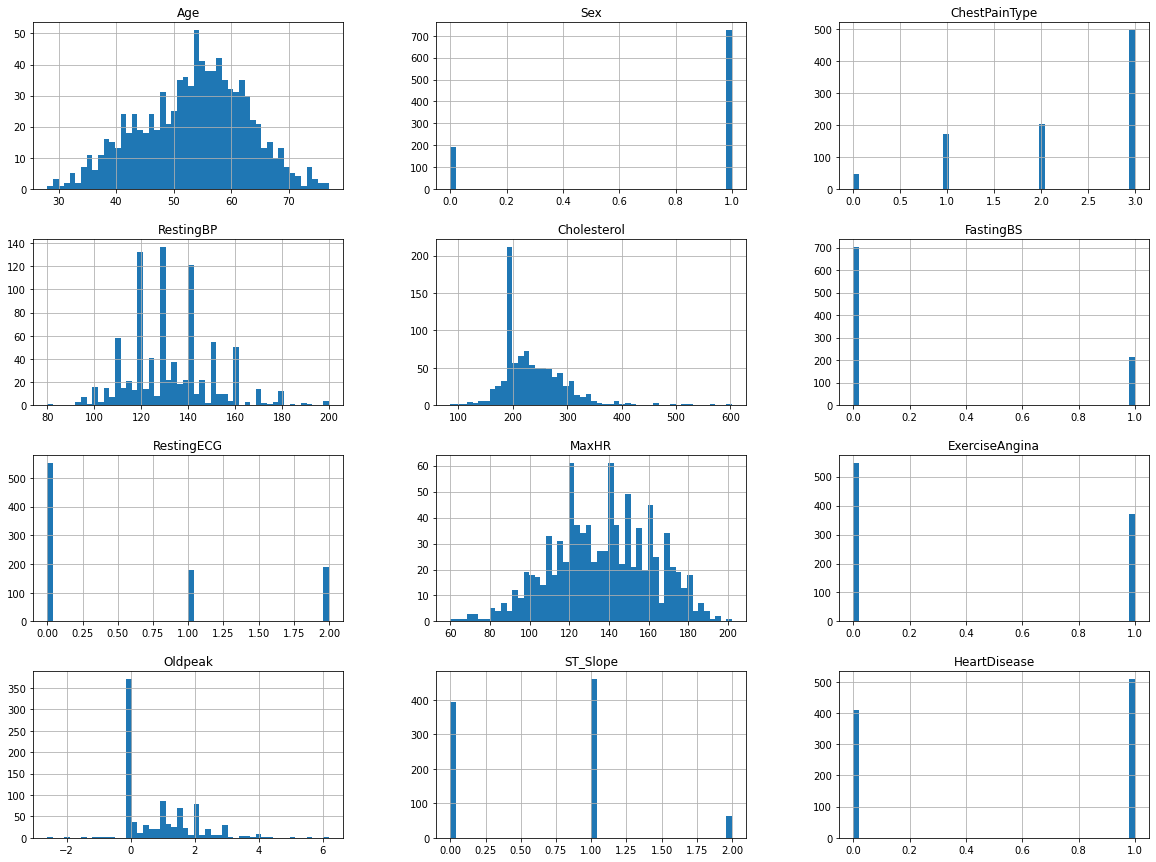

In [7]:
dt.hist(bins=50,figsize=(20,15))
print("Hist: ")

Matriz de cofusão: 


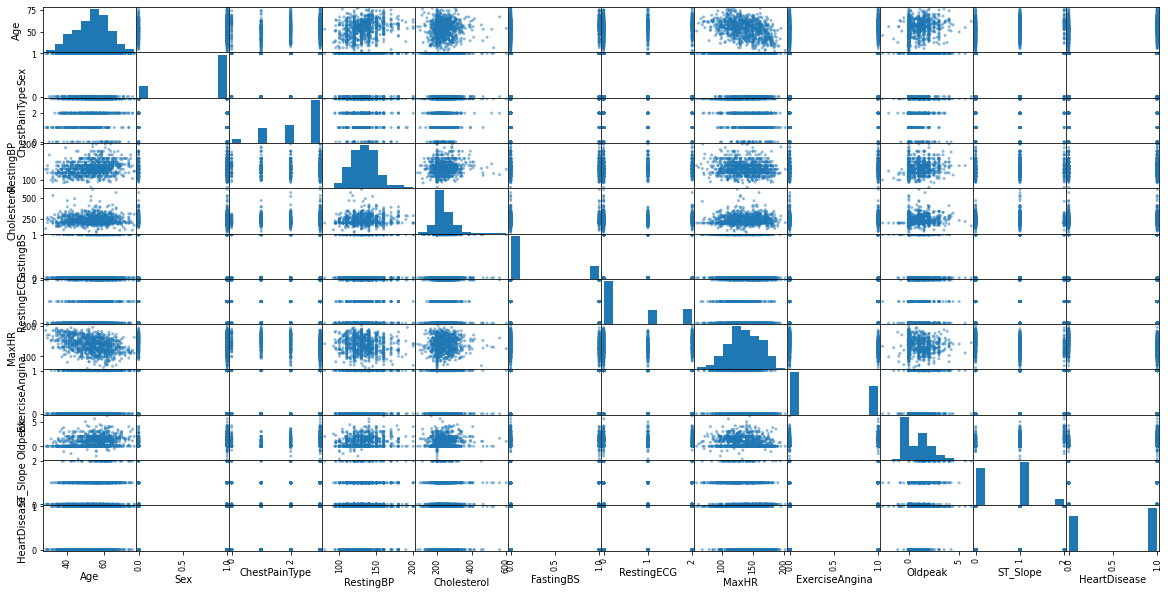

In [8]:
pd.plotting.scatter_matrix(dt, figsize=(20,10))
print('Matriz de cofusão: ')

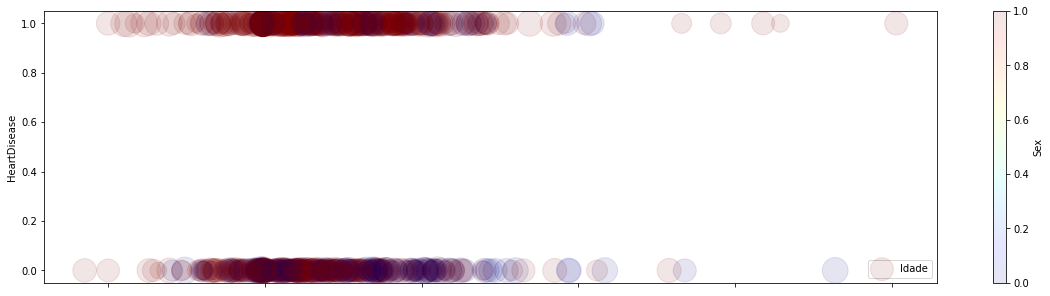

In [9]:
dt.plot(kind="scatter", y="HeartDisease", x="Cholesterol", alpha=0.1,s=dt["Age"]*10, label="Idade",c="Sex",cmap=plt.get_cmap("jet"), colorbar=True,figsize=(20,5))
plt.legend()

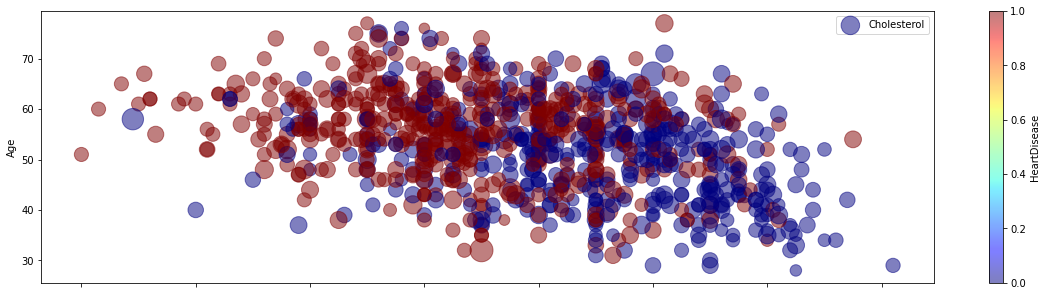

In [10]:
# como os dados são binários, é mais interessante tentar aplicar uma cor ao resultado
# o resultado abaixo ainda é influenciado pelo tamanho dos círculos

dt.plot(kind="scatter", x="MaxHR", y="Age", alpha=0.5, s='Cholesterol', label="Cholesterol",
c="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True, figsize=(20,5) )
plt.legend()

# Se você alterar o parâmetro "alpha", você altera a região que precisaria classificar
#

In [12]:
dt['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [13]:
dt.corr()

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750       0.165896   0.263079     0.006397   
Sex             0.055750  1.000000       0.168254   0.009421    -0.151270   
ChestPainType   0.165896  0.168254       1.000000   0.020645     0.007314   
RestingBP       0.263079  0.009421       0.020645   1.000000     0.096524   
Cholesterol     0.006397 -0.151270       0.007314   0.096524     1.000000   
FastingBS       0.198039  0.120076       0.116703   0.067816    -0.061967   
RestingECG      0.213152 -0.018343       0.031383   0.094498     0.089840   
MaxHR          -0.382045 -0.189186      -0.343654  -0.109669     0.072644   
ExerciseAngina  0.215793  0.190664       0.416625   0.153015     0.047294   
Oldpeak         0.258612  0.105734       0.245027   0.174215     0.059128   
ST_Slope        0.268264  0.150693       0.317480   0.082134     0.013094   
HeartDisease    0.282039  0.305445       0.471354   0.117930    -0.012340   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age              0.198039    0.213152 -0.382045        0.215793  0.258612   
Sex              0.120076   -0.018343 -0.189186        0.190664  0.105734   
ChestPainType    0.116703    0.031383 -0.343654        0.416625  0.245027   
RestingBP        0.067816    0.094498 -0.109669        0.153015  0.174215   
Cholesterol     -0.061967    0.089840  0.072644        0.047294  0.059128   
FastingBS        1.000000    0.050707 -0.131438        0.060451  0.052698   
RestingECG       0.050707    1.000000  0.048552        0.036119  0.114428   
MaxHR           -0.131438    0.048552  1.000000       -0.370425 -0.160691   
ExerciseAngina   0.060451    0.036119 -0.370425        1.000000  0.408752   
Oldpeak          0.052698    0.114428 -0.160691        0.408752  1.000000   
ST_Slope         0.175774    0.078807 -0.343419        0.428706  0.501921   
HeartDisease     0.267291    0.061011 -0.400421        0.494282  0.403951   

                ST_Slope  HeartDisease  
Age             0.268264      0.282039  
Sex             0.150693      0.305445  
ChestPainType   0.317480      0.471354  
RestingBP       0.082134      0.117930  
Cholesterol     0.013094     -0.012340  
FastingBS       0.175774      0.267291  
RestingECG      0.078807      0.061011  
MaxHR          -0.343419     -0.400421  
ExerciseAngina  0.428706      0.494282  
Oldpeak         0.501921      0.403951  
ST_Slope        1.000000      0.558771  
HeartDisease    0.558771      1.000000

In [14]:
# vamos plotar a combinação das variáveis com maior correlação:
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
# 4- Oldpeak ou MaxHR

# O banco de dados utilizados é muito pequeno para tentar treinar fetures de Sexo e Idade


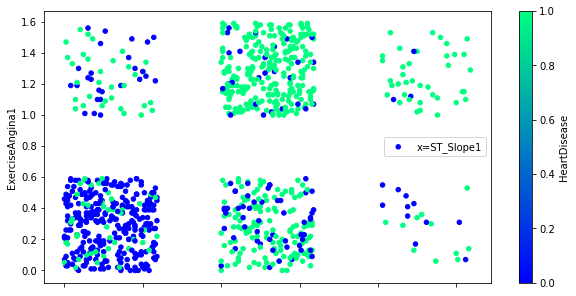

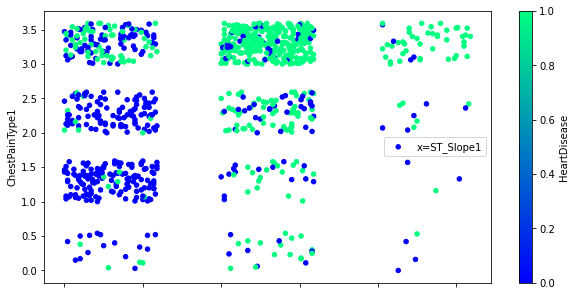

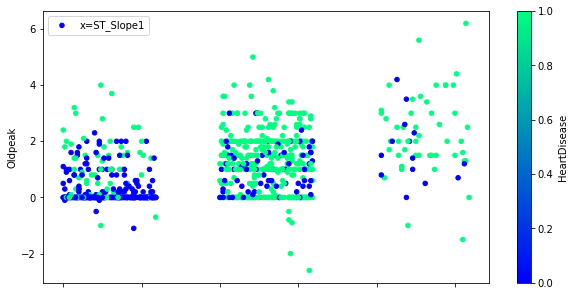

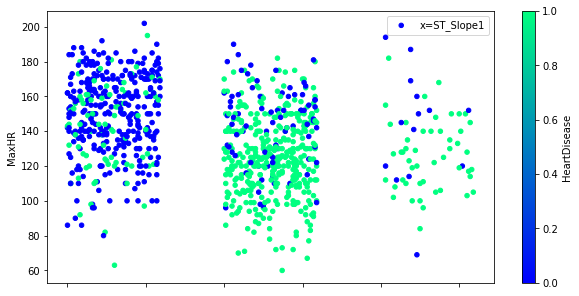

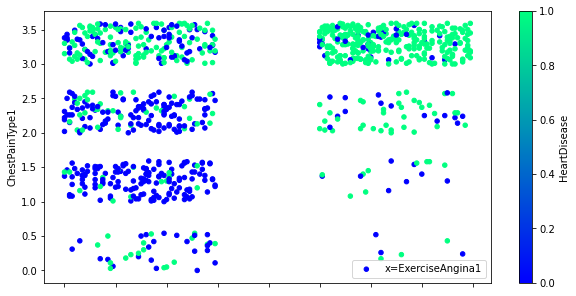

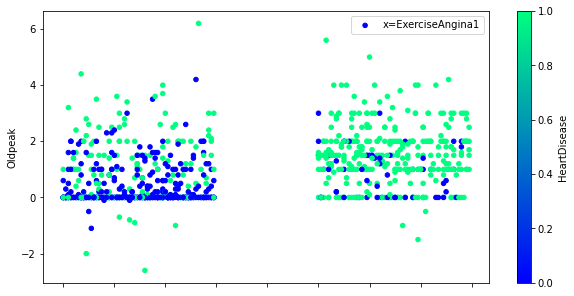

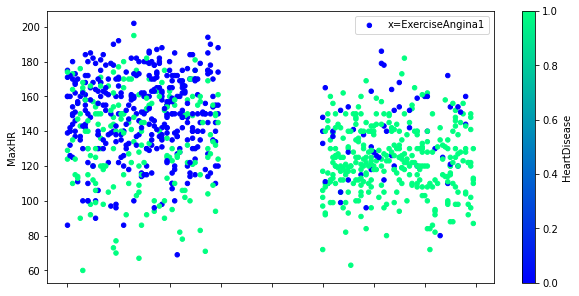

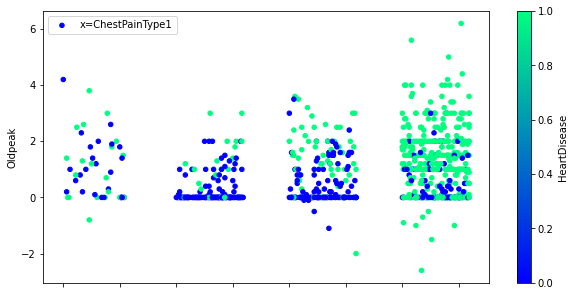

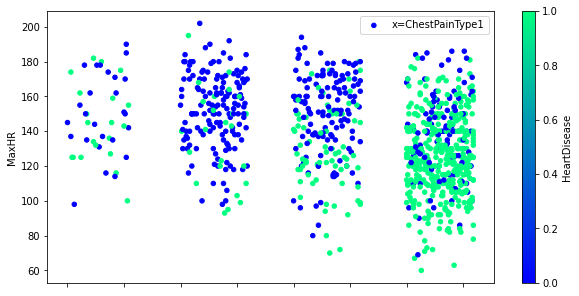

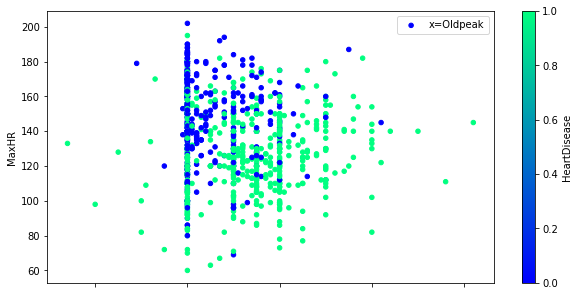

In [23]:
import random
aumento = 60
dt['ST_Slope1'] = dt['ST_Slope'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ExerciseAngina1'] = dt['ExerciseAngina'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ChestPainType1'] = dt['ChestPainType'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['RestingECG1'] = dt['RestingECG'].apply(lambda x : x+(random.randrange(0,aumento)/100))

# Gerar uma matriz de confusao:
All_col = ['ST_Slope1','ExerciseAngina1','ChestPainType1','Oldpeak','MaxHR']
col = []
for x in range(len(All_col)):
    for xx in range(x+1,len(All_col)):
        col.append( (All_col[x],All_col[xx]))
        

for c in col:
    dt.plot(kind='scatter', x=c[0], y = c[1], alpha=1,
        label='x='+c[0], title='',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,5)
       )
    plt.legend()


Matriz de confusão: 


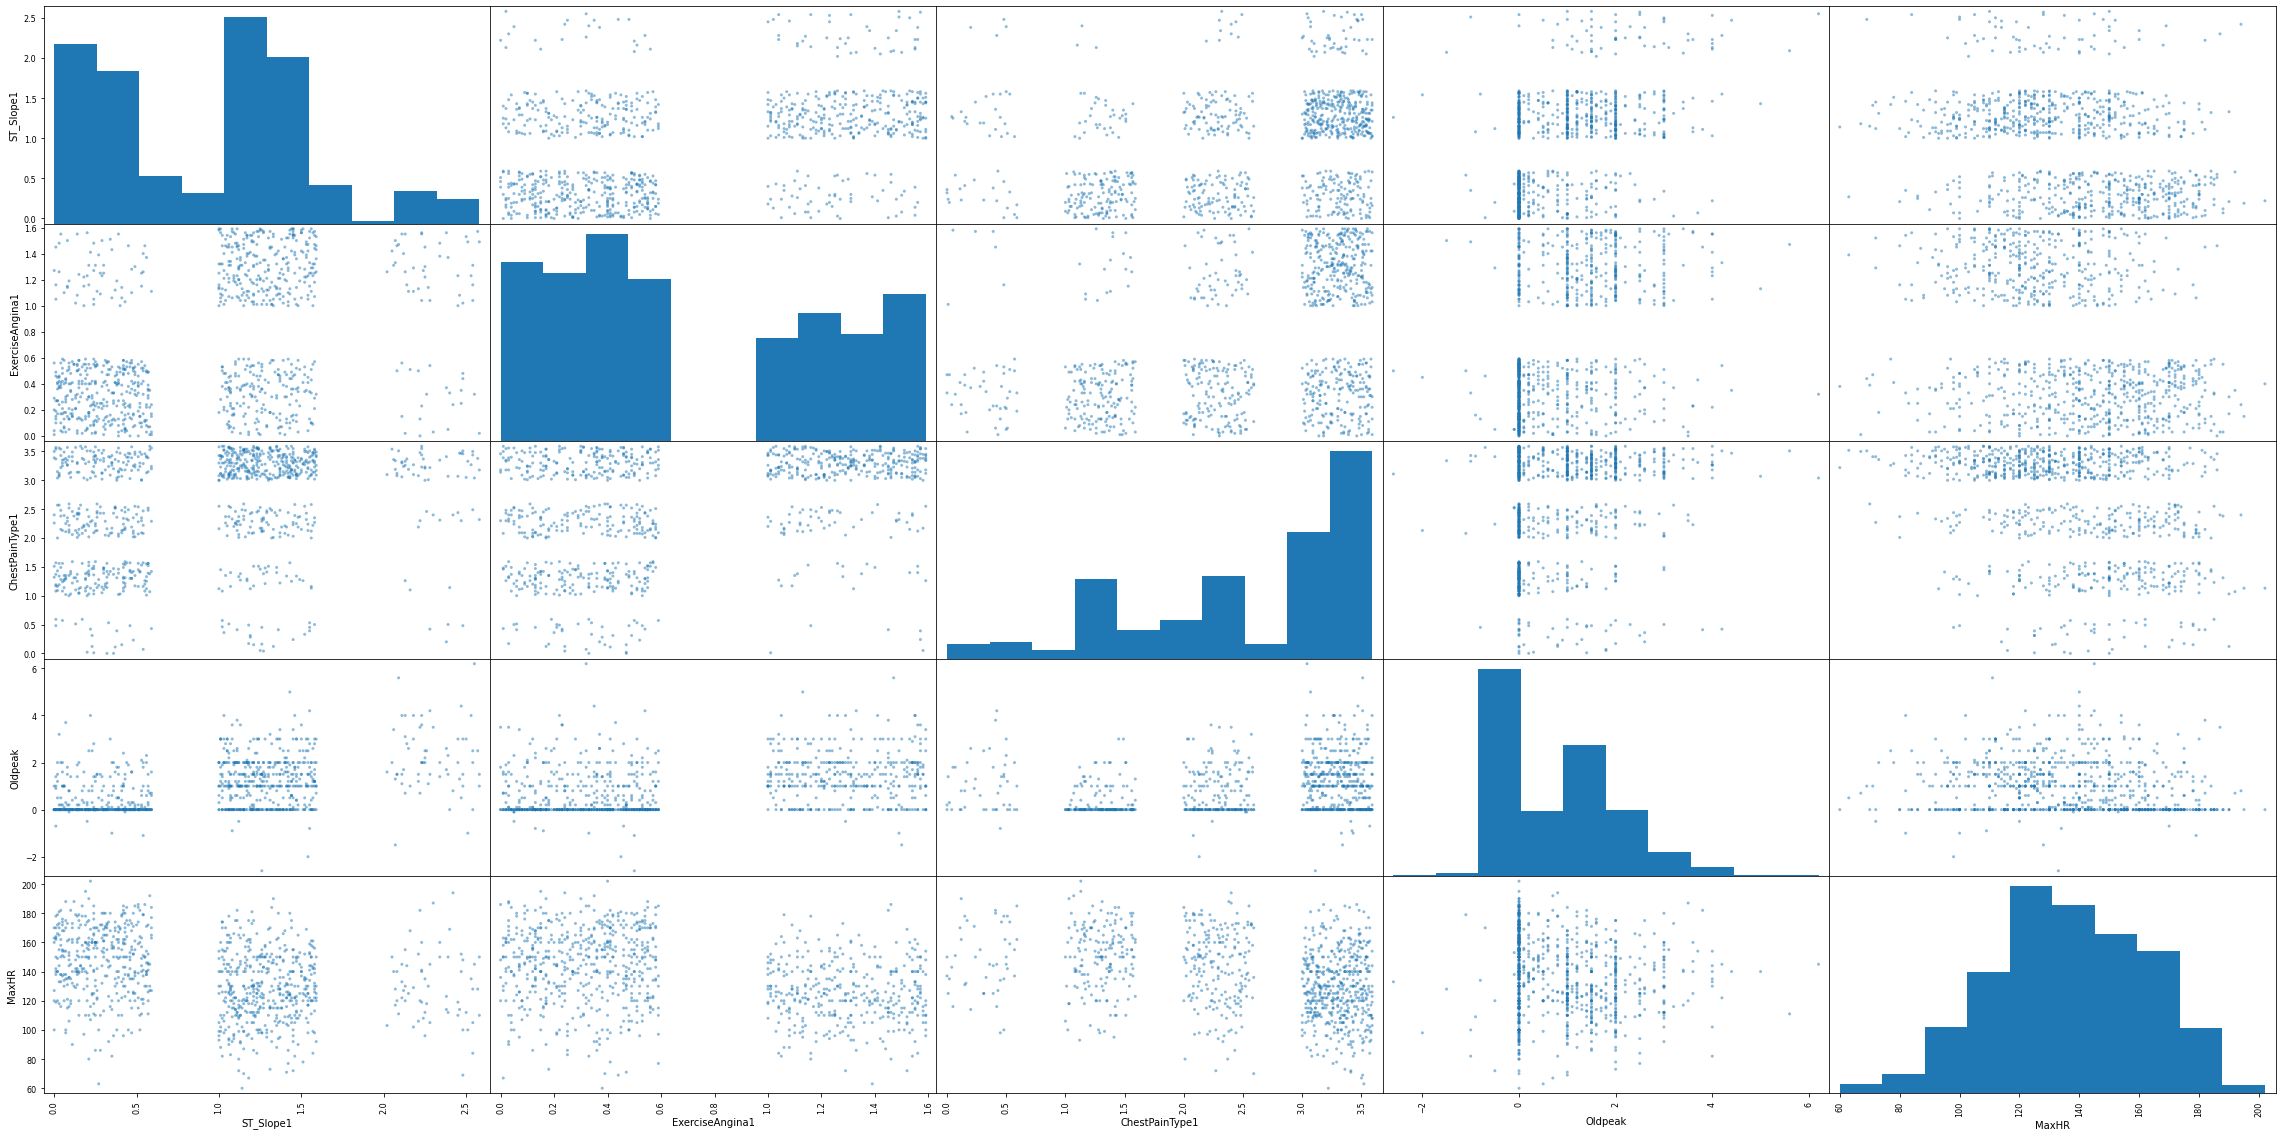

In [16]:
dbin = pd.DataFrame()

for i in All_col:
    dbin[i] = dt[i]

pd.plotting.scatter_matrix(dbin,figsize=(40,20))
print('Matriz de confusão: ')
#pd.plotting.scatter_matrix(dt, figsize=(20,10))
#pd.plotting.scatter_matrix(dt, figsize=(20,10))

In [17]:
"""dt.plot(kind="scatter", x="indices", y="ChestPainType", alpha=0.4,
# s=dt['Cholesterol'] , 
s = (dt['ExerciseAngina']*10)+1,
label=" ",        
c="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True,
figsize=(20,5)
)
plt.legend( )
"""

'dt.plot(kind="scatter", x="indices", y="ChestPainType", alpha=0.4,\n# s=dt[\'Cholesterol\'] , \ns = (dt[\'ExerciseAngina\']*10)+1,\nlabel=" ",        \nc="HeartDisease",cmap=plt.get_cmap("jet"), colorbar=True,\nfigsize=(20,5)\n)\nplt.legend( )\n'

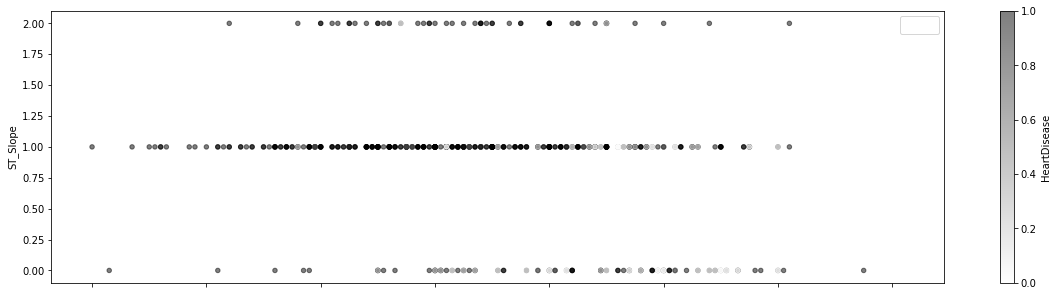

In [18]:
dt.plot(kind="scatter", x="MaxHR", y="ST_Slope", alpha=0.5,
# s=dt['Cholesterol'] , 
# s = (dt['ExerciseAngina']*10)+1,

label=" ",        
c="HeartDisease",cmap=plt.get_cmap("binary"), colorbar=True,
figsize=(20,5)
)
plt.legend( )

In [19]:
# me parece que temos varias variaveis binárias
## como cada uma delas se relacionam com a chance de ter doença cardíaca?
# vamos testar os fields com a maior correlação:
# ST_Slope
# ExerciseAngina
# ChestPainType
# Como fazemos isso?
# Como comparar dois valores binarios?




In [20]:
# dt.describe()

In [21]:
# dt.plot(kind='scatter', x='ExerciseAngina', y = 'ST_Slope', alpha=0.2,label="indices", c='HeartDisease', cmap=plt.get_cmap("jet"),figsize=(10,10))

In [22]:
import random
aumento = 80
dt['ST_Slope1'] = dt['ST_Slope'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ExerciseAngina1'] = dt['ExerciseAngina'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ChestPainType1'] = dt['ChestPainType'].apply(lambda x : x+(random.randrange(0,aumento)/100))
 




<AxesSubplot:title={'center':'test'}, xlabel='ExerciseAngina1', ylabel='ST_Slope1'>

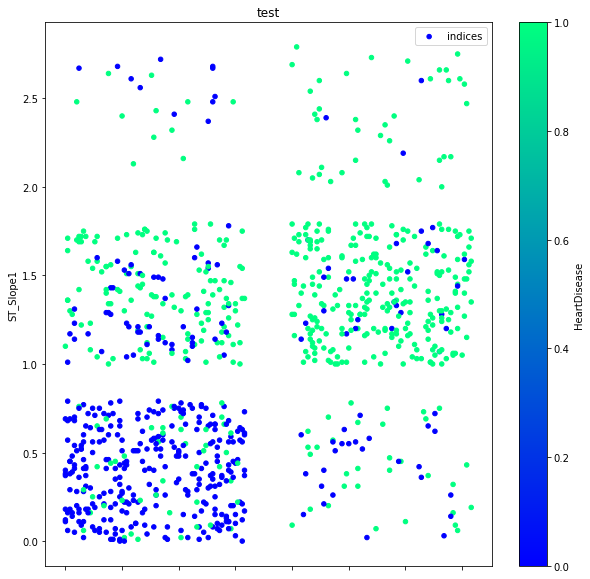

In [23]:
# Agora ficou visível uma relação, não?!
dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=1,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,10)
       )
 


In [24]:
# vamos tentar colocar mais uma variavel no jogo?
"""
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
"""

"\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n"

<AxesSubplot:title={'center':'test'}, xlabel="{'center': 'test', 'labelpad': 1}", ylabel='ST_Slope1'>

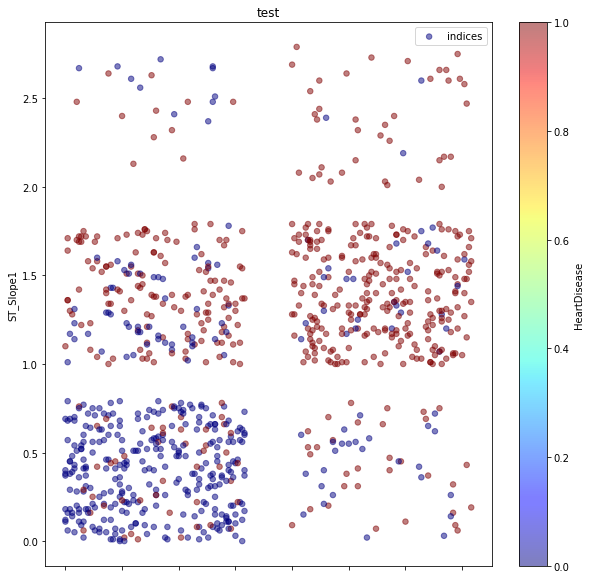

In [25]:
# Relação entre 

# style = 
dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=0.5,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("jet"), s=30,
        figsize=(10,10),
        xlabel={'center':'test', 'labelpad':1}
       )
#print(dt.axes)


<AxesSubplot:xlabel='ExerciseAngina1', ylabel='ChestPainType1'>

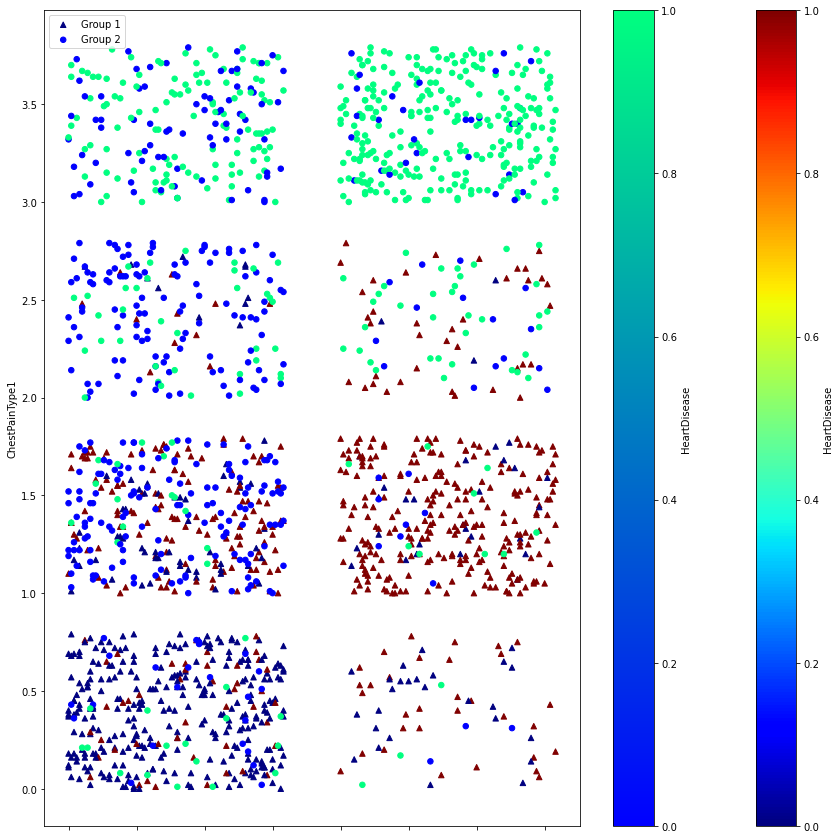

In [26]:
"""dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ChestPainType', alpha=0.5,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("jet"), marker='^',
        figsize=(10,10)
       )
plt.xlabel("Culmen Length (mm)",fontweight ='bold', size=14)    
"""

"""
ST_Slope
ExerciseAngina
ChestPainType
Oldpeak
"""

ax = dt.plot.scatter(x='ExerciseAngina1', y = 'ST_Slope1' , label="Group 1", c='HeartDisease', cmap=plt.get_cmap("jet"), marker='^', s=30)



dt.plot.scatter(x='ExerciseAngina1', y = 'ChestPainType1', label="Group 2",  c='HeartDisease', 
                cmap=plt.get_cmap("winter"), ax=ax,figsize=(15,15),s=30)




<AxesSubplot:title={'center':'test'}, xlabel='ExerciseAngina1', ylabel='ST_Slope1'>

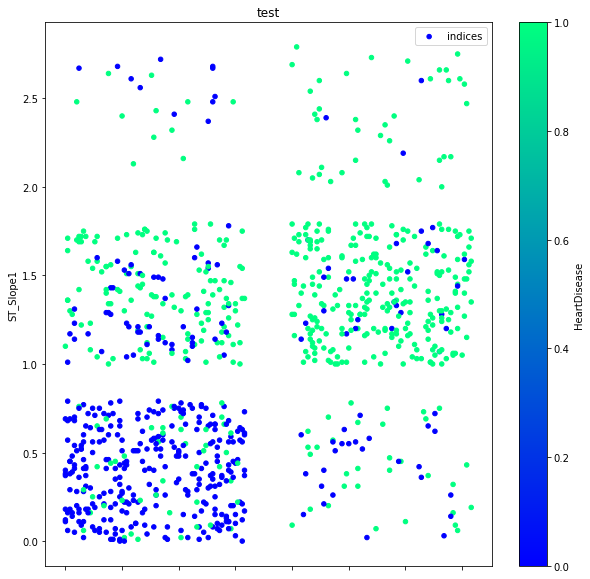

In [27]:

dt.plot(kind='scatter', x='ExerciseAngina1', y = 'ST_Slope1', alpha=1,
        label="indices", title='test',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,10)
       )
 

In [28]:
# Por que NÃO foi considerado o sexo do indivíduo?
# O problema de considerar o sexo é que os dados são experimentais, portanto, 
# a relação do banco de dados pode ser tendenciosa e não necessáriamente refletir o que acontece na natureaza

In [29]:
# Vamos investigar as variáveis que possuem maior correlação:


In [30]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,  y_treino,y_teste, = train_test_split(dbin,dt['HeartDisease'],test_size= 0.2)

from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))



Accuracy:  0.7989130434782609


In [31]:
print(x_treino)
print(y_treino)

     ST_Slope1  ExerciseAngina1  ChestPainType1  Oldpeak  MaxHR
903       0.15             0.14            1.05      0.0    163
597       0.09             0.40            2.59      0.2    136
99        0.16             0.13            1.14      0.0    144
817       1.55             1.15            3.32      2.8    141
879       2.16             0.51            1.10      1.0    168
..         ...              ...             ...      ...    ...
178       0.42             0.12            2.14      0.0    150
816       0.31             0.58            3.18      0.0    171
153       0.49             0.41            3.49      0.0    140
643       1.05             0.19            2.21      2.5    165
109       0.09             0.53            1.00      0.0    106

[734 rows x 5 columns]
903    0
597    0
99     0
817    1
879    1
      ..
178    0
816    1
153    0
643    1
109    0
Name: HeartDisease, Length: 734, dtype: int64


Relação de pessoas que tiveram insuficiência cardíaca: 0.5533769063180828
É uma relação equilibrada, portanto a chance de ser enviasada é baixa


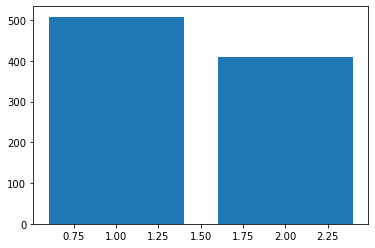

In [32]:
"""
    Finalizar a preparação dos dados para iniciar a rede neural
"""


# proporação de pessoas com insuficiência no banco de dados
resultados_len = len(dt[dt.HeartDisease == 1]), len(dt[dt.HeartDisease == 0])
print("Relação de pessoas que tiveram insuficiência cardíaca:", resultados_len[0]/ (resultados_len[1]+resultados_len[0]))
print("É uma relação equilibrada, portanto a chance de ser enviasada é baixa")
fig, ax = plt.subplots()
ax.bar([1,2], resultados_len)
plt.show()

In [33]:
"""
db = pd.DataFrame()
db["ST_Slope"] = dt["ST_Slope"]
db["ExerciseAngina"] = dt["ExerciseAngina"]
#db["ChestPainType"] = dt["ChestPainType"]
for dor_tipo in ["TA","ATA","NAP","ASY"]:
    db["ChestPainType_"+dor_tipo] = dt["ChestPainType"].apply(lambda x: 1 if dor_tipo == x else 0)
db["MaxHR"] = dt["MaxHR"].apply(lambda x: (x-60) /(202-60))
db["Oldpeak"] = dt["Oldpeak"]
db["HeartDisease"] = dt["HeartDisease"]
db.head()
# 1- ST_Slope
# 2- ExerciseAngina
# 3- ChestPainType
# 4- Oldpeak ou MaxHR

#db.Oldpeak.describe()
db.MaxHR.describe()
db.head(20)
# db['ChestPainType'].hea

# dt["RestingBP"] = dt["RestingBP"].apply(lambda x: dt["RestingBP"].mean() if x == 0 else x)
"""

'\ndb = pd.DataFrame()\ndb["ST_Slope"] = dt["ST_Slope"]\ndb["ExerciseAngina"] = dt["ExerciseAngina"]\n#db["ChestPainType"] = dt["ChestPainType"]\nfor dor_tipo in ["TA","ATA","NAP","ASY"]:\n    db["ChestPainType_"+dor_tipo] = dt["ChestPainType"].apply(lambda x: 1 if dor_tipo == x else 0)\ndb["MaxHR"] = dt["MaxHR"].apply(lambda x: (x-60) /(202-60))\ndb["Oldpeak"] = dt["Oldpeak"]\ndb["HeartDisease"] = dt["HeartDisease"]\ndb.head()\n# 1- ST_Slope\n# 2- ExerciseAngina\n# 3- ChestPainType\n# 4- Oldpeak ou MaxHR\n\n#db.Oldpeak.describe()\ndb.MaxHR.describe()\ndb.head(20)\n# db[\'ChestPainType\'].hea\n\n# dt["RestingBP"] = dt["RestingBP"].apply(lambda x: dt["RestingBP"].mean() if x == 0 else x)\n'

In [47]:
"""
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))

"""
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(db, train_size=0.8)


x_treino,x_teste,y_treino,y_teste = train_test_split(db,dt['HeartDisease'],test_size= 0.2)
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))


Accuracy:  0.8586956521739131
     ExerciseAngina  ChestPainType  ST_Slope
35                0            0.1       0.0
838               1            0.3       0.0
273               0            0.2       0.0
324               0            0.3       0.1
175               1            0.3       0.1
..              ...            ...       ...
147               0            0.1       0.0
429               1            0.2       0.1
389               0            0.3       0.1
132               1            0.3       0.1
804               1            0.2       0.1

[184 rows x 3 columns]


In [36]:
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_treino,y_treino)

print('Accuracy: ',modelo.score(x_teste,y_teste))

Accuracy:  0.8804347826086957


In [37]:
""" 
    TESTANDO COM PERCEPTRON
"""
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [38]:
model = Perceptron()
model.fit(x_treino,y_treino)
y_pred = model.predict(x_teste)
metrics.accuracy_score(y_teste,y_pred)

0.8206521739130435

In [216]:
x_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 525 to 662
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ExerciseAngina  734 non-null    int64  
 1   ChestPainType   734 non-null    float64
 2   Oldpeak         734 non-null    float64
 3   ST_Slope        734 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.7 KB


In [48]:
"""
    Tensorflow
"""
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
number_epochs = 100
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [50]:
# Define Sequential model with 3 layers
model = tf.keras.Sequential(
    [
        layers.Dense(10, activation="sigmoid", name="Camada de Entrada"),
      #  layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(1, name="Camada de Saída"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
 
#y = model(x)


2022-07-17 13:23:57.090188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-17 13:23:57.094862: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [51]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,  y_treino,y_teste = train_test_split(db,dt['HeartDisease'],test_size= 0.2)

In [52]:
x_treino.shape[1]

3

In [53]:
activacoes = ['relu','softmax','gelu','sigmoid','softplus','softsign','tanh','silu']
loss_types = ['KLD','MAE','MAPE','MSE','MSLE','binary_crossentropy','binary_focal_crossentropy','categorical_hinge',
            'cosine_similarity','deserialize','get','hinge','huber','kl_divergence','kld','kullback_leibler_divergence',
              'log_cosh','logcosh','mae','mape','mean_absolute_error','mean_absolute_percentage_error','mean_squared_error',
              'mean_squared_logarithmic_error','mse','msle','poisson','serialize','sparse_categorical_crossentropy',
              'squared_hinge']
resultado =[]
#for loss_type in loss_types:
loss_type = 'binary_crossentropy'

In [54]:
x_treino,x_teste,y_treino,y_teste = train_test_split(db,dt['HeartDisease'],test_size= 0.2)

In [55]:
import numpy as np
max_seed = 198
initializer = tf.keras.initializers.HeNormal()



optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.01)

optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD')


optimizer_Adagrad= tf.keras.optimizers.Adagrad(
    learning_rate=0.000000001,
    initial_accumulator_value=0.01,
    epsilon=1e-07,
    name="Adagrad",
 
)


loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model = tf.keras.models.Sequential([

              tf.keras.layers.Dense(x_treino.shape[1], activation='relu', input_shape=(x_treino.shape[1],), kernel_initializer=initializer),
              tf.keras.layers.Dense(5, activation='sigmoid'),
              tf.keras.layers.Dense(1, activation='sigmoid'),
              tf.keras.layers.Dense(1, activation='ThresholdedReLU') 
            ])

model.compile(optimizer=optimizer_Adagrad,
                          loss='binary_crossentropy',
                          #loss='mean_squared_error',
                          metrics=['accuracy'])

#model.summary()
model.fit(x_treino, y_treino, epochs=10, steps_per_epoch=3,    batch_size=256)
#print(  model.evaluate(x_teste,  y_teste, verbose=1)[1] )
    
print("Teste accuracy:", model.evaluate(x_teste,  y_teste, verbose=0)[1])
print("Treino accuracy:", model.evaluate(x_treino,  y_treino, verbose=2)[1])

Epoch 1/10
3/3 [==============================] - 1s 38ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 2/10
3/3 [==============================] - 0s 33ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 3/10
3/3 [==============================] - 0s 34ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 8.6161 - accuracy: 0.4414
Teste accuracy: 0.46739131212234497

In [56]:
model.fit(x_treino, y_treino, epochs=10)

model.evaluate(x_teste,  y_teste, verbose=2, batch_size=32)

Epoch 1/10
23/23 [==============================] - 0s 10ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 3/10
23/23 [==============================] - 0s 8ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 4/10
23/23 [==============================] - 0s 8ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 5/10
23/23 [==============================] - 0s 9ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 8/10
23/23 [==============================] - 0s 9ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 9/10
23/23 [==============================] - 0s 7ms/step - loss: 8.6161 - accuracy: 0.4414
Epoch 10/10
23/23 [==============================] - 0s 7ms/step - loss: 8.6161 - accuracy: 0.4414
6/6 - 0s - loss: 8

[8.215461730957031, 0.46739131212234497]

In [57]:
def plot_hist_and_predictions(history, x, y, model, s=15, cmap='bwr'):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')

    ax = plt.subplot(1, 2, 2)
    plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=s, cmap=cmap)

    plt.subplot(1, 2, 2, sharex=ax, sharey=ax)
    x1, x2, x_mesh = __compute_meshgrid(x, y)
    y_mesh = model.predict_classes(x_mesh)
    plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=s, cmap=cmap)
    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap=cmap, alpha=0.5)

In [58]:
loss_types = ['KLD','MAE','MAPE','MSE','MSLE','binary_crossentropy','binary_focal_crossentropy','categorical_crossentropy','categorical_hinge','cosine_similarity','deserialize','get','hinge','huber','kl_divergence','kld','kullback_leibler_divergence','log_cosh','logcosh','mae','mape','mean_absolute_error','mean_absolute_percentage_error','mean_squared_error','mean_squared_logarithmic_error','mse','msle','poisson','serialize','sparse_categorical_crossentropy','squared_hinge']

In [274]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(x_treino.shape[1],)))
model.add(tf.keras.layers.Dense(150,activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid ))
model.summary()
model.compile(optimizer='adam',
            loss='binary_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_teste,y_teste,batch_size=32, epochs=100,verbose=1)
#plot_hist_and_predictions(hist.history(x_teste,y_teste,model))
model.evaluate(x_teste,  y_teste, verbose=1) 

          

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 100)               400       
                                                                 
 dense_137 (Dense)           (None, 150)               15150     
                                                                 
 dense_138 (Dense)           (None, 1)                 151       
                                                                 
Total params: 15,701
Trainable params: 15,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6/6 [==============================] - 0s 17ms/step - loss: 0.6612 - accuracy: 0.6957
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6303 - accuracy: 0.7826
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.6082 - accuracy: 0.7446
Epoch 4/100
6/6 [===

6/6 [==============================] - 0s 14ms/step - loss: 0.3677 - accuracy: 0.8533
Epoch 77/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3692 - accuracy: 0.8533
Epoch 78/100
6/6 [==============================] - 0s 7ms/step - loss: 0.3659 - accuracy: 0.8533
Epoch 79/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.8533
Epoch 80/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3682 - accuracy: 0.8533
Epoch 81/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3654 - accuracy: 0.8533
Epoch 82/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.8533
Epoch 83/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3648 - accuracy: 0.8533
Epoch 84/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3690 - accuracy: 0.8533
Epoch 85/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3653 - accuracy: 0.8533
Epoch 86/100
6/6 [==============

[0.3597807288169861, 0.85326087474823]

In [60]:
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.01)

optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.001,
    momentum=0.1,
    nesterov=False,
    name='SGD')


optimizer_Adagrad= tf.keras.optimizers.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.01,
    epsilon=1e-07,
    name="Adagrad",
 
)

In [61]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(x_treino.shape[1],)))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid ))
model.summary()
model.compile(optimizer=optimizer_adam,
            loss='binary_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_teste,y_teste,batch_size=32, epochs=100,verbose=0)
model.evaluate(x_teste,  y_teste, verbose=1) 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               400       
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 13ms/step - loss: 0.3361 - accuracy: 0.8533


[0.3361494839191437, 0.85326087474823]

In [315]:
import hashlib

########################################
####     Vamos dividir os dados    #####
########################################
"""
  => aqui vamos utilizar uma aborgem com hash, 
  => vamos criar um índice
  => gerar o hash desse índice e utilizar o útlimo hexadecimal como aleatoridade
  *** obs como é um hexadeciamal, pode variar entre 0 - 255
"""
def GetHash(value):# gera um hash e retorna o último hexadecimal
     return hashlib.md5(np.int64(value)).digest()[-1]

def split_database( data_base, ratios, y ):
    # cria e preenche uma coluna com o valor do último hex do hash ( gerado a partir do indice)
    c_split = pd.Series([GetHash(indice) for indice in range(len(db))])        
    
    for indice, ratio in enumerate(ratios):
        # cria uma marcação para cada faixa de ratio
        c_split = c_split.apply( lambda x: 256+indice if x < 256*ratio else x)
        # retorna os dados marcados
        yield data_base[ c_split == 256+indice ].drop(columns=[y])
        yield data_base[ c_split == 256+indice ][y]
        
    # retorna os dados restantes ( aqueles que não foram marcados)
    yield data_base[ c_split < 256].drop(columns=[y])
    yield data_base[ c_split < 256][y]
        
    
x_verify,y_verify,  x_test,y_test,   x_train,y_train= split_database(db,[0.08,0.25],'HeartDisease')

print("---- Proporções ----")
print("Verificação: ", round(len(x_verify)*100/len(db),2),'%')
print("      Teste: ", round(len(  x_test)*100/len(db),2),'%')
print("     Treino: ", round(len( x_train)*100/len(db),2),'%')

---- Proporções ----
Verificação:  6.75 %
      Teste:  16.23 %
     Treino:  77.02 %


In [327]:
# gera banco de dados para verificação
x_verify,x_temp,y_verify,y_temp = train_test_split(db,dt['HeartDisease'],test_size= 0.09, random_state=42)

In [343]:
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.01)



optimizer_Adagrad= tf.keras.optimizers.Adagrad(
    learning_rate=0.1,
    initial_accumulator_value=0.01,
    epsilon=1e-07,
    name="Adagrad",
 
)


def calcRede():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(x_treino.shape[1],)))
    model.add(tf.keras.layers.Dense(120,activation=tf.nn.relu ))
    model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid ))
    #model.summary()
    model.compile(optimizer=optimizer_adam,
                loss='binary_crossentropy',
                 metrics=['accuracy'])
    hist = model.fit(x_treino,y_treino,batch_size=128, epochs=200,verbose=0)
    return model.evaluate(x_teste,  y_teste, verbose=0)

semente = 0
last_acurracy = [0,0]
loop_max= 1000
for i in range(loop_max):
    semente = i
    #x_treino,x_teste,y_treino,y_teste = train_test_split(x_temp,y_temp,test_size= 0.18, random_state=semente)
    x_treino,x_teste,y_treino,y_teste = train_test_split(db, dt['HeartDisease'],test_size= 0.3, random_state=semente)
    a = calcRede()
    if a[1] > last_acurracy[1]:
        last_acurracy[1] = a[1]
        last_acurracy[0] = semente
    print(i,a[1],'   the best: ',last_acurracy, i/loop_max)

0 0.8079710006713867    the best:  [0, 0.8079710006713867] 0.0
1 0.8550724387168884    the best:  [1, 0.8550724387168884] 0.001
2 0.804347813129425    the best:  [1, 0.8550724387168884] 0.002
3 0.8550724387168884    the best:  [1, 0.8550724387168884] 0.003
4 0.8115941882133484    the best:  [1, 0.8550724387168884] 0.004
5 0.8442028760910034    the best:  [1, 0.8550724387168884] 0.005
6 0.8260869383811951    the best:  [1, 0.8550724387168884] 0.006
7 0.8224637508392334    the best:  [1, 0.8550724387168884] 0.007
8 0.804347813129425    the best:  [1, 0.8550724387168884] 0.008
9 0.8333333134651184    the best:  [1, 0.8550724387168884] 0.009
10 0.8260869383811951    the best:  [1, 0.8550724387168884] 0.01
11 0.8007246255874634    the best:  [1, 0.8550724387168884] 0.011
12 0.8369565010070801    the best:  [1, 0.8550724387168884] 0.012
13 0.8333333134651184    the best:  [1, 0.8550724387168884] 0.013
14 0.782608687877655    the best:  [1, 0.8550724387168884] 0.014
15 0.8079710006713867    t

123 0.8442028760910034    the best:  [21, 0.8731883764266968] 0.123
124 0.8514492511749268    the best:  [21, 0.8731883764266968] 0.124
125 0.8405796885490417    the best:  [21, 0.8731883764266968] 0.125
126 0.8188405632972717    the best:  [21, 0.8731883764266968] 0.126
127 0.8405796885490417    the best:  [21, 0.8731883764266968] 0.127
128 0.8115941882133484    the best:  [21, 0.8731883764266968] 0.128
129 0.8079710006713867    the best:  [21, 0.8731883764266968] 0.129
130 0.8623188138008118    the best:  [21, 0.8731883764266968] 0.13
131 0.8260869383811951    the best:  [21, 0.8731883764266968] 0.131
132 0.8188405632972717    the best:  [21, 0.8731883764266968] 0.132
133 0.7971014380455017    the best:  [21, 0.8731883764266968] 0.133
134 0.8188405632972717    the best:  [21, 0.8731883764266968] 0.134
135 0.8152173757553101    the best:  [21, 0.8731883764266968] 0.135
136 0.8224637508392334    the best:  [21, 0.8731883764266968] 0.136
137 0.8405796885490417    the best:  [21, 0.87318

244 0.8007246255874634    the best:  [21, 0.8731883764266968] 0.244
245 0.8079710006713867    the best:  [21, 0.8731883764266968] 0.245
246 0.8152173757553101    the best:  [21, 0.8731883764266968] 0.246
247 0.8369565010070801    the best:  [21, 0.8731883764266968] 0.247
248 0.7971014380455017    the best:  [21, 0.8731883764266968] 0.248
249 0.8152173757553101    the best:  [21, 0.8731883764266968] 0.249
250 0.8224637508392334    the best:  [21, 0.8731883764266968] 0.25
251 0.7862318754196167    the best:  [21, 0.8731883764266968] 0.251
252 0.8586956262588501    the best:  [21, 0.8731883764266968] 0.252
253 0.8333333134651184    the best:  [21, 0.8731883764266968] 0.253
254 0.77173912525177    the best:  [21, 0.8731883764266968] 0.254
255 0.8007246255874634    the best:  [21, 0.8731883764266968] 0.255
256 0.8297101259231567    the best:  [21, 0.8731883764266968] 0.256
257 0.8333333134651184    the best:  [21, 0.8731883764266968] 0.257
258 0.8333333134651184    the best:  [21, 0.8731883

364 0.8224637508392334    the best:  [328, 0.8913043737411499] 0.364
365 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.365
366 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.366
367 0.8478260636329651    the best:  [328, 0.8913043737411499] 0.367
368 0.8188405632972717    the best:  [328, 0.8913043737411499] 0.368
369 0.8442028760910034    the best:  [328, 0.8913043737411499] 0.369
370 0.8478260636329651    the best:  [328, 0.8913043737411499] 0.37
371 0.8152173757553101    the best:  [328, 0.8913043737411499] 0.371
372 0.8007246255874634    the best:  [328, 0.8913043737411499] 0.372
373 0.8442028760910034    the best:  [328, 0.8913043737411499] 0.373
374 0.79347825050354    the best:  [328, 0.8913043737411499] 0.374
375 0.8369565010070801    the best:  [328, 0.8913043737411499] 0.375
376 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.376
377 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.377
378 0.8405796885490417    the best:  

484 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.484
485 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.485
486 0.804347813129425    the best:  [328, 0.8913043737411499] 0.486
487 0.8079710006713867    the best:  [328, 0.8913043737411499] 0.487
488 0.7862318754196167    the best:  [328, 0.8913043737411499] 0.488
489 0.8405796885490417    the best:  [328, 0.8913043737411499] 0.489
490 0.8405796885490417    the best:  [328, 0.8913043737411499] 0.49
491 0.8550724387168884    the best:  [328, 0.8913043737411499] 0.491
492 0.8405796885490417    the best:  [328, 0.8913043737411499] 0.492
493 0.804347813129425    the best:  [328, 0.8913043737411499] 0.493
494 0.7681159377098083    the best:  [328, 0.8913043737411499] 0.494
495 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.495
496 0.8514492511749268    the best:  [328, 0.8913043737411499] 0.496
497 0.8405796885490417    the best:  [328, 0.8913043737411499] 0.497
498 0.8007246255874634    the best:  

604 0.7971014380455017    the best:  [328, 0.8913043737411499] 0.604
605 0.8586956262588501    the best:  [328, 0.8913043737411499] 0.605
606 0.8405796885490417    the best:  [328, 0.8913043737411499] 0.606
607 0.8478260636329651    the best:  [328, 0.8913043737411499] 0.607
608 0.8297101259231567    the best:  [328, 0.8913043737411499] 0.608
609 0.8405796885490417    the best:  [328, 0.8913043737411499] 0.609
610 0.8152173757553101    the best:  [328, 0.8913043737411499] 0.61
611 0.8152173757553101    the best:  [328, 0.8913043737411499] 0.611
612 0.8478260636329651    the best:  [328, 0.8913043737411499] 0.612
613 0.8260869383811951    the best:  [328, 0.8913043737411499] 0.613
614 0.7753623127937317    the best:  [328, 0.8913043737411499] 0.614
615 0.8405796885490417    the best:  [328, 0.8913043737411499] 0.615
616 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.616
617 0.8478260636329651    the best:  [328, 0.8913043737411499] 0.617
618 0.8369565010070801    the best:

724 0.8876811861991882    the best:  [328, 0.8913043737411499] 0.724
725 0.8260869383811951    the best:  [328, 0.8913043737411499] 0.725
726 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.726
727 0.8297101259231567    the best:  [328, 0.8913043737411499] 0.727
728 0.8152173757553101    the best:  [328, 0.8913043737411499] 0.728
729 0.8297101259231567    the best:  [328, 0.8913043737411499] 0.729
730 0.8369565010070801    the best:  [328, 0.8913043737411499] 0.73
731 0.8152173757553101    the best:  [328, 0.8913043737411499] 0.731
732 0.8478260636329651    the best:  [328, 0.8913043737411499] 0.732
733 0.8442028760910034    the best:  [328, 0.8913043737411499] 0.733
734 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.734
735 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.735
736 0.8224637508392334    the best:  [328, 0.8913043737411499] 0.736
737 0.8442028760910034    the best:  [328, 0.8913043737411499] 0.737
738 0.8152173757553101    the best:

844 0.8442028760910034    the best:  [328, 0.8913043737411499] 0.844
845 0.8405796885490417    the best:  [328, 0.8913043737411499] 0.845
846 0.8586956262588501    the best:  [328, 0.8913043737411499] 0.846
847 0.8514492511749268    the best:  [328, 0.8913043737411499] 0.847
848 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.848
849 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.849
850 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.85
851 0.8442028760910034    the best:  [328, 0.8913043737411499] 0.851
852 0.79347825050354    the best:  [328, 0.8913043737411499] 0.852
853 0.8586956262588501    the best:  [328, 0.8913043737411499] 0.853
854 0.8260869383811951    the best:  [328, 0.8913043737411499] 0.854
855 0.8260869383811951    the best:  [328, 0.8913043737411499] 0.855
856 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.856
857 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.857
858 0.8405796885490417    the best:  

964 0.8478260636329651    the best:  [328, 0.8913043737411499] 0.964
965 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.965
966 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.966
967 0.8623188138008118    the best:  [328, 0.8913043737411499] 0.967
968 0.8115941882133484    the best:  [328, 0.8913043737411499] 0.968
969 0.8007246255874634    the best:  [328, 0.8913043737411499] 0.969
970 0.8079710006713867    the best:  [328, 0.8913043737411499] 0.97
971 0.8333333134651184    the best:  [328, 0.8913043737411499] 0.971
972 0.8224637508392334    the best:  [328, 0.8913043737411499] 0.972
973 0.8079710006713867    the best:  [328, 0.8913043737411499] 0.973
974 0.8478260636329651    the best:  [328, 0.8913043737411499] 0.974
975 0.8297101259231567    the best:  [328, 0.8913043737411499] 0.975
976 0.8224637508392334    the best:  [328, 0.8913043737411499] 0.976
977 0.8297101259231567    the best:  [328, 0.8913043737411499] 0.977
978 0.8369565010070801    the best:

In [346]:
valores =[4,70, 0,21,328 ]

for v in valores:
    print("_---------------------------")
    x_verify,x_temp,y_verify,y_temp = train_test_split(db,dt['HeartDisease'],test_size= 0.09, random_state=42)
    x_treino,x_teste,y_treino,y_teste = train_test_split(x_temp,y_temp,test_size= 0.18, random_state=v)
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(x_treino.shape[1],)))
    model.add(tf.keras.layers.Dense(120,activation=tf.nn.relu ))
    model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid ))
    model.summary()
    model.compile(optimizer=optimizer_adam,
                    loss='binary_crossentropy',
                     metrics=['accuracy'])
    hist = model.fit(x_treino,y_treino,batch_size=128, epochs=200,verbose=0)
    print(model.evaluate(x_teste,  y_teste, verbose=1) ) 
    print(model.evaluate(x_verify,  y_verify, verbose=1) )
    


_---------------------------
Model: "sequential_1360"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4078 (Dense)          (None, 100)               600       
                                                                 
 dense_4079 (Dense)          (None, 120)               12120     
                                                                 
 dense_4080 (Dense)          (None, 1)                 121       
                                                                 
Total params: 12,841
Trainable params: 12,841
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 207ms/step - loss: 0.5538 - accuracy: 0.8000
[0.5537570714950562, 0.800000011920929]
27/27 [==============================] - 0s 4ms/step - loss: 1.7400 - accuracy: 0.7844
[1.7400431632995605, 0.7844311594963074]
_--------------------------

In [2]:
### INICIANDO O TENSORFLOW ###
import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%load_ext tensorboard


2022-07-18 12:12:45.076618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-18 12:12:45.076649: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [101]:

optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#x_verify,x_temp,y_verify,y_temp = train_test_split(db,dt['HeartDisease'],test_size= 0.09, random_state=42)
#x_treino,x_teste,y_treino,y_teste = train_test_split(x_temp,y_temp,test_size= 0.18, random_state=328)
x_treino,x_teste,y_treino,y_teste = train_test_split(db, dt['HeartDisease'],test_size= 0.3, random_state=328)
  
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(x_treino.shape[1],)))
model.add(tf.keras.layers.Dense(120,activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid ))
    #model.summary()
model.compile(optimizer=optimizer_adam,
                loss='binary_crossentropy',
                 metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



model.fit(x_treino,y_treino,batch_size=128, epochs=5000,verbose=2,
                callbacks=[tensorboard_callback]
                 
                )
print(model.evaluate(x_teste,  y_teste, verbose=2))
print(model.evaluate(x_treino,  y_treino, verbose=2))


Epoch 1/5000
6/6 - 1s - loss: 0.6728 - accuracy: 0.6262 - 522ms/epoch - 87ms/step
Epoch 2/5000
6/6 - 0s - loss: 0.6282 - accuracy: 0.7617 - 59ms/epoch - 10ms/step
Epoch 3/5000
6/6 - 0s - loss: 0.6010 - accuracy: 0.7570 - 53ms/epoch - 9ms/step
Epoch 4/5000
6/6 - 0s - loss: 0.5824 - accuracy: 0.7710 - 57ms/epoch - 9ms/step
Epoch 5/5000
6/6 - 0s - loss: 0.5679 - accuracy: 0.7368 - 54ms/epoch - 9ms/step
Epoch 6/5000
6/6 - 0s - loss: 0.5619 - accuracy: 0.7259 - 50ms/epoch - 8ms/step
Epoch 7/5000
6/6 - 0s - loss: 0.5583 - accuracy: 0.7243 - 64ms/epoch - 11ms/step
Epoch 8/5000
6/6 - 0s - loss: 0.5477 - accuracy: 0.7274 - 57ms/epoch - 9ms/step
Epoch 9/5000
6/6 - 0s - loss: 0.5379 - accuracy: 0.7492 - 79ms/epoch - 13ms/step
Epoch 10/5000
6/6 - 0s - loss: 0.5280 - accuracy: 0.7461 - 59ms/epoch - 10ms/step
Epoch 11/5000
6/6 - 0s - loss: 0.5213 - accuracy: 0.7508 - 50ms/epoch - 8ms/step
Epoch 12/5000
6/6 - 0s - loss: 0.5159 - accuracy: 0.7445 - 49ms/epoch - 8ms/step
Epoch 13/5000
6/6 - 0s - loss: 

Epoch 102/5000
6/6 - 0s - loss: 0.4224 - accuracy: 0.8162 - 72ms/epoch - 12ms/step
Epoch 103/5000
6/6 - 0s - loss: 0.4228 - accuracy: 0.8131 - 63ms/epoch - 11ms/step
Epoch 104/5000
6/6 - 0s - loss: 0.4239 - accuracy: 0.8115 - 60ms/epoch - 10ms/step
Epoch 105/5000
6/6 - 0s - loss: 0.4261 - accuracy: 0.8100 - 59ms/epoch - 10ms/step
Epoch 106/5000
6/6 - 0s - loss: 0.4493 - accuracy: 0.7913 - 62ms/epoch - 10ms/step
Epoch 107/5000
6/6 - 0s - loss: 0.4357 - accuracy: 0.8037 - 65ms/epoch - 11ms/step
Epoch 108/5000
6/6 - 0s - loss: 0.4348 - accuracy: 0.8115 - 62ms/epoch - 10ms/step
Epoch 109/5000
6/6 - 0s - loss: 0.4716 - accuracy: 0.7944 - 60ms/epoch - 10ms/step
Epoch 110/5000
6/6 - 0s - loss: 0.4569 - accuracy: 0.8006 - 64ms/epoch - 11ms/step
Epoch 111/5000
6/6 - 0s - loss: 0.4296 - accuracy: 0.8193 - 71ms/epoch - 12ms/step
Epoch 112/5000
6/6 - 0s - loss: 0.4233 - accuracy: 0.8131 - 56ms/epoch - 9ms/step
Epoch 113/5000
6/6 - 0s - loss: 0.4215 - accuracy: 0.8162 - 61ms/epoch - 10ms/step
Epoch

Epoch 201/5000
6/6 - 0s - loss: 0.4132 - accuracy: 0.8146 - 62ms/epoch - 10ms/step
Epoch 202/5000
6/6 - 0s - loss: 0.4115 - accuracy: 0.8162 - 70ms/epoch - 12ms/step
Epoch 203/5000
6/6 - 0s - loss: 0.4153 - accuracy: 0.8193 - 68ms/epoch - 11ms/step
Epoch 204/5000
6/6 - 0s - loss: 0.4119 - accuracy: 0.8209 - 59ms/epoch - 10ms/step
Epoch 205/5000
6/6 - 0s - loss: 0.4126 - accuracy: 0.8193 - 69ms/epoch - 11ms/step
Epoch 206/5000
6/6 - 0s - loss: 0.4154 - accuracy: 0.8178 - 57ms/epoch - 10ms/step
Epoch 207/5000
6/6 - 0s - loss: 0.4170 - accuracy: 0.8131 - 55ms/epoch - 9ms/step
Epoch 208/5000
6/6 - 0s - loss: 0.4138 - accuracy: 0.8162 - 61ms/epoch - 10ms/step
Epoch 209/5000
6/6 - 0s - loss: 0.4129 - accuracy: 0.8146 - 57ms/epoch - 10ms/step
Epoch 210/5000
6/6 - 0s - loss: 0.4123 - accuracy: 0.8178 - 71ms/epoch - 12ms/step
Epoch 211/5000
6/6 - 0s - loss: 0.4133 - accuracy: 0.8131 - 57ms/epoch - 10ms/step
Epoch 212/5000
6/6 - 0s - loss: 0.4126 - accuracy: 0.8100 - 58ms/epoch - 10ms/step
Epoch

Epoch 300/5000
6/6 - 0s - loss: 0.4057 - accuracy: 0.8224 - 66ms/epoch - 11ms/step
Epoch 301/5000
6/6 - 0s - loss: 0.4034 - accuracy: 0.8178 - 57ms/epoch - 10ms/step
Epoch 302/5000
6/6 - 0s - loss: 0.4071 - accuracy: 0.8209 - 64ms/epoch - 11ms/step
Epoch 303/5000
6/6 - 0s - loss: 0.4078 - accuracy: 0.8255 - 59ms/epoch - 10ms/step
Epoch 304/5000
6/6 - 0s - loss: 0.4054 - accuracy: 0.8240 - 62ms/epoch - 10ms/step
Epoch 305/5000
6/6 - 0s - loss: 0.4033 - accuracy: 0.8255 - 64ms/epoch - 11ms/step
Epoch 306/5000
6/6 - 0s - loss: 0.4011 - accuracy: 0.8255 - 63ms/epoch - 11ms/step
Epoch 307/5000
6/6 - 0s - loss: 0.4003 - accuracy: 0.8224 - 55ms/epoch - 9ms/step
Epoch 308/5000
6/6 - 0s - loss: 0.3990 - accuracy: 0.8318 - 74ms/epoch - 12ms/step
Epoch 309/5000
6/6 - 0s - loss: 0.4034 - accuracy: 0.8193 - 61ms/epoch - 10ms/step
Epoch 310/5000
6/6 - 0s - loss: 0.4002 - accuracy: 0.8240 - 57ms/epoch - 10ms/step
Epoch 311/5000
6/6 - 0s - loss: 0.4061 - accuracy: 0.8193 - 58ms/epoch - 10ms/step
Epoch

Epoch 399/5000
6/6 - 0s - loss: 0.3921 - accuracy: 0.8193 - 61ms/epoch - 10ms/step
Epoch 400/5000
6/6 - 0s - loss: 0.3892 - accuracy: 0.8364 - 69ms/epoch - 11ms/step
Epoch 401/5000
6/6 - 0s - loss: 0.3923 - accuracy: 0.8333 - 70ms/epoch - 12ms/step
Epoch 402/5000
6/6 - 0s - loss: 0.3925 - accuracy: 0.8333 - 57ms/epoch - 10ms/step
Epoch 403/5000
6/6 - 0s - loss: 0.3955 - accuracy: 0.8209 - 62ms/epoch - 10ms/step
Epoch 404/5000
6/6 - 0s - loss: 0.3975 - accuracy: 0.8178 - 63ms/epoch - 10ms/step
Epoch 405/5000
6/6 - 0s - loss: 0.3966 - accuracy: 0.8240 - 60ms/epoch - 10ms/step
Epoch 406/5000
6/6 - 0s - loss: 0.3973 - accuracy: 0.8302 - 66ms/epoch - 11ms/step
Epoch 407/5000
6/6 - 0s - loss: 0.3940 - accuracy: 0.8318 - 58ms/epoch - 10ms/step
Epoch 408/5000
6/6 - 0s - loss: 0.3941 - accuracy: 0.8209 - 67ms/epoch - 11ms/step
Epoch 409/5000
6/6 - 0s - loss: 0.3933 - accuracy: 0.8178 - 56ms/epoch - 9ms/step
Epoch 410/5000
6/6 - 0s - loss: 0.3908 - accuracy: 0.8209 - 59ms/epoch - 10ms/step
Epoch

6/6 - 0s - loss: 0.3957 - accuracy: 0.8318 - 54ms/epoch - 9ms/step
Epoch 499/5000
6/6 - 0s - loss: 0.3845 - accuracy: 0.8318 - 58ms/epoch - 10ms/step
Epoch 500/5000
6/6 - 0s - loss: 0.3831 - accuracy: 0.8396 - 52ms/epoch - 9ms/step
Epoch 501/5000
6/6 - 0s - loss: 0.3792 - accuracy: 0.8411 - 54ms/epoch - 9ms/step
Epoch 502/5000
6/6 - 0s - loss: 0.3797 - accuracy: 0.8333 - 46ms/epoch - 8ms/step
Epoch 503/5000
6/6 - 0s - loss: 0.3770 - accuracy: 0.8333 - 47ms/epoch - 8ms/step
Epoch 504/5000
6/6 - 0s - loss: 0.3761 - accuracy: 0.8349 - 45ms/epoch - 8ms/step
Epoch 505/5000
6/6 - 0s - loss: 0.3792 - accuracy: 0.8349 - 58ms/epoch - 10ms/step
Epoch 506/5000
6/6 - 0s - loss: 0.3895 - accuracy: 0.8318 - 50ms/epoch - 8ms/step
Epoch 507/5000
6/6 - 0s - loss: 0.3884 - accuracy: 0.8271 - 59ms/epoch - 10ms/step
Epoch 508/5000
6/6 - 0s - loss: 0.3838 - accuracy: 0.8287 - 61ms/epoch - 10ms/step
Epoch 509/5000
6/6 - 0s - loss: 0.3810 - accuracy: 0.8427 - 48ms/epoch - 8ms/step
Epoch 510/5000
6/6 - 0s - l

Epoch 598/5000
6/6 - 0s - loss: 0.3722 - accuracy: 0.8489 - 49ms/epoch - 8ms/step
Epoch 599/5000
6/6 - 0s - loss: 0.3811 - accuracy: 0.8302 - 45ms/epoch - 8ms/step
Epoch 600/5000
6/6 - 0s - loss: 0.3801 - accuracy: 0.8333 - 47ms/epoch - 8ms/step
Epoch 601/5000
6/6 - 0s - loss: 0.3670 - accuracy: 0.8411 - 51ms/epoch - 8ms/step
Epoch 602/5000
6/6 - 0s - loss: 0.3690 - accuracy: 0.8427 - 47ms/epoch - 8ms/step
Epoch 603/5000
6/6 - 0s - loss: 0.3691 - accuracy: 0.8396 - 45ms/epoch - 7ms/step
Epoch 604/5000
6/6 - 0s - loss: 0.3676 - accuracy: 0.8458 - 44ms/epoch - 7ms/step
Epoch 605/5000
6/6 - 0s - loss: 0.3659 - accuracy: 0.8396 - 54ms/epoch - 9ms/step
Epoch 606/5000
6/6 - 0s - loss: 0.3710 - accuracy: 0.8318 - 45ms/epoch - 7ms/step
Epoch 607/5000
6/6 - 0s - loss: 0.3672 - accuracy: 0.8349 - 44ms/epoch - 7ms/step
Epoch 608/5000
6/6 - 0s - loss: 0.3791 - accuracy: 0.8411 - 60ms/epoch - 10ms/step
Epoch 609/5000
6/6 - 0s - loss: 0.3798 - accuracy: 0.8333 - 48ms/epoch - 8ms/step
Epoch 610/5000


Epoch 698/5000
6/6 - 0s - loss: 0.3623 - accuracy: 0.8474 - 49ms/epoch - 8ms/step
Epoch 699/5000
6/6 - 0s - loss: 0.3591 - accuracy: 0.8505 - 45ms/epoch - 8ms/step
Epoch 700/5000
6/6 - 0s - loss: 0.3704 - accuracy: 0.8411 - 46ms/epoch - 8ms/step
Epoch 701/5000
6/6 - 0s - loss: 0.3616 - accuracy: 0.8505 - 45ms/epoch - 7ms/step
Epoch 702/5000
6/6 - 0s - loss: 0.3566 - accuracy: 0.8551 - 47ms/epoch - 8ms/step
Epoch 703/5000
6/6 - 0s - loss: 0.3556 - accuracy: 0.8520 - 48ms/epoch - 8ms/step
Epoch 704/5000
6/6 - 0s - loss: 0.3556 - accuracy: 0.8489 - 46ms/epoch - 8ms/step
Epoch 705/5000
6/6 - 0s - loss: 0.3585 - accuracy: 0.8427 - 38ms/epoch - 6ms/step
Epoch 706/5000
6/6 - 0s - loss: 0.3571 - accuracy: 0.8458 - 46ms/epoch - 8ms/step
Epoch 707/5000
6/6 - 0s - loss: 0.3550 - accuracy: 0.8520 - 46ms/epoch - 8ms/step
Epoch 708/5000
6/6 - 0s - loss: 0.3575 - accuracy: 0.8442 - 45ms/epoch - 7ms/step
Epoch 709/5000
6/6 - 0s - loss: 0.3569 - accuracy: 0.8474 - 45ms/epoch - 7ms/step
Epoch 710/5000
6

Epoch 798/5000
6/6 - 0s - loss: 0.3476 - accuracy: 0.8458 - 54ms/epoch - 9ms/step
Epoch 799/5000
6/6 - 0s - loss: 0.3653 - accuracy: 0.8380 - 64ms/epoch - 11ms/step
Epoch 800/5000
6/6 - 0s - loss: 0.3542 - accuracy: 0.8364 - 44ms/epoch - 7ms/step
Epoch 801/5000
6/6 - 0s - loss: 0.3509 - accuracy: 0.8458 - 55ms/epoch - 9ms/step
Epoch 802/5000
6/6 - 0s - loss: 0.3516 - accuracy: 0.8489 - 60ms/epoch - 10ms/step
Epoch 803/5000
6/6 - 0s - loss: 0.3571 - accuracy: 0.8489 - 56ms/epoch - 9ms/step
Epoch 804/5000
6/6 - 0s - loss: 0.3520 - accuracy: 0.8598 - 64ms/epoch - 11ms/step
Epoch 805/5000
6/6 - 0s - loss: 0.3497 - accuracy: 0.8583 - 53ms/epoch - 9ms/step
Epoch 806/5000
6/6 - 0s - loss: 0.3487 - accuracy: 0.8598 - 55ms/epoch - 9ms/step
Epoch 807/5000
6/6 - 0s - loss: 0.3464 - accuracy: 0.8629 - 53ms/epoch - 9ms/step
Epoch 808/5000
6/6 - 0s - loss: 0.3459 - accuracy: 0.8629 - 48ms/epoch - 8ms/step
Epoch 809/5000
6/6 - 0s - loss: 0.3474 - accuracy: 0.8567 - 55ms/epoch - 9ms/step
Epoch 810/500

Epoch 898/5000
6/6 - 0s - loss: 0.3459 - accuracy: 0.8520 - 68ms/epoch - 11ms/step
Epoch 899/5000
6/6 - 0s - loss: 0.3418 - accuracy: 0.8567 - 45ms/epoch - 7ms/step
Epoch 900/5000
6/6 - 0s - loss: 0.3550 - accuracy: 0.8536 - 46ms/epoch - 8ms/step
Epoch 901/5000
6/6 - 0s - loss: 0.3562 - accuracy: 0.8629 - 46ms/epoch - 8ms/step
Epoch 902/5000
6/6 - 0s - loss: 0.3575 - accuracy: 0.8567 - 58ms/epoch - 10ms/step
Epoch 903/5000
6/6 - 0s - loss: 0.3451 - accuracy: 0.8645 - 53ms/epoch - 9ms/step
Epoch 904/5000
6/6 - 0s - loss: 0.3410 - accuracy: 0.8583 - 54ms/epoch - 9ms/step
Epoch 905/5000
6/6 - 0s - loss: 0.3538 - accuracy: 0.8442 - 48ms/epoch - 8ms/step
Epoch 906/5000
6/6 - 0s - loss: 0.3589 - accuracy: 0.8505 - 39ms/epoch - 6ms/step
Epoch 907/5000
6/6 - 0s - loss: 0.3571 - accuracy: 0.8520 - 46ms/epoch - 8ms/step
Epoch 908/5000
6/6 - 0s - loss: 0.3690 - accuracy: 0.8396 - 58ms/epoch - 10ms/step
Epoch 909/5000
6/6 - 0s - loss: 0.3719 - accuracy: 0.8474 - 44ms/epoch - 7ms/step
Epoch 910/500

6/6 - 0s - loss: 0.3328 - accuracy: 0.8583 - 42ms/epoch - 7ms/step
Epoch 998/5000
6/6 - 0s - loss: 0.3332 - accuracy: 0.8660 - 54ms/epoch - 9ms/step
Epoch 999/5000
6/6 - 0s - loss: 0.3336 - accuracy: 0.8660 - 54ms/epoch - 9ms/step
Epoch 1000/5000
6/6 - 0s - loss: 0.3389 - accuracy: 0.8598 - 59ms/epoch - 10ms/step
Epoch 1001/5000
6/6 - 0s - loss: 0.3453 - accuracy: 0.8520 - 63ms/epoch - 11ms/step
Epoch 1002/5000
6/6 - 0s - loss: 0.3431 - accuracy: 0.8489 - 54ms/epoch - 9ms/step
Epoch 1003/5000
6/6 - 0s - loss: 0.3429 - accuracy: 0.8427 - 62ms/epoch - 10ms/step
Epoch 1004/5000
6/6 - 0s - loss: 0.3457 - accuracy: 0.8396 - 62ms/epoch - 10ms/step
Epoch 1005/5000
6/6 - 0s - loss: 0.3348 - accuracy: 0.8692 - 92ms/epoch - 15ms/step
Epoch 1006/5000
6/6 - 0s - loss: 0.3465 - accuracy: 0.8629 - 64ms/epoch - 11ms/step
Epoch 1007/5000
6/6 - 0s - loss: 0.3429 - accuracy: 0.8660 - 57ms/epoch - 10ms/step
Epoch 1008/5000
6/6 - 0s - loss: 0.3386 - accuracy: 0.8614 - 49ms/epoch - 8ms/step
Epoch 1009/5000

Epoch 1096/5000
6/6 - 0s - loss: 0.3313 - accuracy: 0.8567 - 63ms/epoch - 10ms/step
Epoch 1097/5000
6/6 - 0s - loss: 0.3378 - accuracy: 0.8489 - 55ms/epoch - 9ms/step
Epoch 1098/5000
6/6 - 0s - loss: 0.3323 - accuracy: 0.8536 - 59ms/epoch - 10ms/step
Epoch 1099/5000
6/6 - 0s - loss: 0.3289 - accuracy: 0.8598 - 53ms/epoch - 9ms/step
Epoch 1100/5000
6/6 - 0s - loss: 0.3257 - accuracy: 0.8645 - 47ms/epoch - 8ms/step
Epoch 1101/5000
6/6 - 0s - loss: 0.3426 - accuracy: 0.8489 - 41ms/epoch - 7ms/step
Epoch 1102/5000
6/6 - 0s - loss: 0.3712 - accuracy: 0.8474 - 45ms/epoch - 8ms/step
Epoch 1103/5000
6/6 - 0s - loss: 0.3398 - accuracy: 0.8583 - 55ms/epoch - 9ms/step
Epoch 1104/5000
6/6 - 0s - loss: 0.3336 - accuracy: 0.8660 - 65ms/epoch - 11ms/step
Epoch 1105/5000
6/6 - 0s - loss: 0.3311 - accuracy: 0.8567 - 64ms/epoch - 11ms/step
Epoch 1106/5000
6/6 - 0s - loss: 0.3261 - accuracy: 0.8645 - 56ms/epoch - 9ms/step
Epoch 1107/5000
6/6 - 0s - loss: 0.3252 - accuracy: 0.8614 - 54ms/epoch - 9ms/step


Epoch 1195/5000
6/6 - 0s - loss: 0.3197 - accuracy: 0.8660 - 49ms/epoch - 8ms/step
Epoch 1196/5000
6/6 - 0s - loss: 0.3186 - accuracy: 0.8629 - 43ms/epoch - 7ms/step
Epoch 1197/5000
6/6 - 0s - loss: 0.3175 - accuracy: 0.8676 - 47ms/epoch - 8ms/step
Epoch 1198/5000
6/6 - 0s - loss: 0.3167 - accuracy: 0.8723 - 45ms/epoch - 7ms/step
Epoch 1199/5000
6/6 - 0s - loss: 0.3165 - accuracy: 0.8707 - 47ms/epoch - 8ms/step
Epoch 1200/5000
6/6 - 0s - loss: 0.3225 - accuracy: 0.8707 - 48ms/epoch - 8ms/step
Epoch 1201/5000
6/6 - 0s - loss: 0.3337 - accuracy: 0.8614 - 42ms/epoch - 7ms/step
Epoch 1202/5000
6/6 - 0s - loss: 0.3239 - accuracy: 0.8754 - 47ms/epoch - 8ms/step
Epoch 1203/5000
6/6 - 0s - loss: 0.3186 - accuracy: 0.8692 - 46ms/epoch - 8ms/step
Epoch 1204/5000
6/6 - 0s - loss: 0.3241 - accuracy: 0.8676 - 47ms/epoch - 8ms/step
Epoch 1205/5000
6/6 - 0s - loss: 0.3204 - accuracy: 0.8723 - 45ms/epoch - 8ms/step
Epoch 1206/5000
6/6 - 0s - loss: 0.3256 - accuracy: 0.8769 - 46ms/epoch - 8ms/step
Epoc

6/6 - 0s - loss: 0.3113 - accuracy: 0.8707 - 73ms/epoch - 12ms/step
Epoch 1294/5000
6/6 - 0s - loss: 0.3224 - accuracy: 0.8629 - 73ms/epoch - 12ms/step
Epoch 1295/5000
6/6 - 0s - loss: 0.3206 - accuracy: 0.8676 - 65ms/epoch - 11ms/step
Epoch 1296/5000
6/6 - 0s - loss: 0.3134 - accuracy: 0.8723 - 72ms/epoch - 12ms/step
Epoch 1297/5000
6/6 - 0s - loss: 0.3145 - accuracy: 0.8676 - 66ms/epoch - 11ms/step
Epoch 1298/5000
6/6 - 0s - loss: 0.3426 - accuracy: 0.8567 - 71ms/epoch - 12ms/step
Epoch 1299/5000
6/6 - 0s - loss: 0.3307 - accuracy: 0.8723 - 80ms/epoch - 13ms/step
Epoch 1300/5000
6/6 - 0s - loss: 0.3469 - accuracy: 0.8536 - 66ms/epoch - 11ms/step
Epoch 1301/5000
6/6 - 0s - loss: 0.3352 - accuracy: 0.8645 - 62ms/epoch - 10ms/step
Epoch 1302/5000
6/6 - 0s - loss: 0.3132 - accuracy: 0.8785 - 74ms/epoch - 12ms/step
Epoch 1303/5000
6/6 - 0s - loss: 0.3141 - accuracy: 0.8754 - 62ms/epoch - 10ms/step
Epoch 1304/5000
6/6 - 0s - loss: 0.3129 - accuracy: 0.8785 - 63ms/epoch - 11ms/step
Epoch 13

Epoch 1391/5000
6/6 - 0s - loss: 0.3080 - accuracy: 0.8738 - 69ms/epoch - 12ms/step
Epoch 1392/5000
6/6 - 0s - loss: 0.3051 - accuracy: 0.8692 - 55ms/epoch - 9ms/step
Epoch 1393/5000
6/6 - 0s - loss: 0.3201 - accuracy: 0.8614 - 53ms/epoch - 9ms/step
Epoch 1394/5000
6/6 - 0s - loss: 0.3303 - accuracy: 0.8567 - 52ms/epoch - 9ms/step
Epoch 1395/5000
6/6 - 0s - loss: 0.3130 - accuracy: 0.8832 - 55ms/epoch - 9ms/step
Epoch 1396/5000
6/6 - 0s - loss: 0.3092 - accuracy: 0.8769 - 65ms/epoch - 11ms/step
Epoch 1397/5000
6/6 - 0s - loss: 0.3024 - accuracy: 0.8847 - 49ms/epoch - 8ms/step
Epoch 1398/5000
6/6 - 0s - loss: 0.3032 - accuracy: 0.8769 - 56ms/epoch - 9ms/step
Epoch 1399/5000
6/6 - 0s - loss: 0.3036 - accuracy: 0.8801 - 58ms/epoch - 10ms/step
Epoch 1400/5000
6/6 - 0s - loss: 0.3041 - accuracy: 0.8754 - 63ms/epoch - 10ms/step
Epoch 1401/5000
6/6 - 0s - loss: 0.3066 - accuracy: 0.8707 - 66ms/epoch - 11ms/step
Epoch 1402/5000
6/6 - 0s - loss: 0.3044 - accuracy: 0.8723 - 63ms/epoch - 10ms/ste

Epoch 1489/5000
6/6 - 0s - loss: 0.2960 - accuracy: 0.8754 - 83ms/epoch - 14ms/step
Epoch 1490/5000
6/6 - 0s - loss: 0.2945 - accuracy: 0.8785 - 81ms/epoch - 14ms/step
Epoch 1491/5000
6/6 - 0s - loss: 0.2968 - accuracy: 0.8816 - 90ms/epoch - 15ms/step
Epoch 1492/5000
6/6 - 0s - loss: 0.2972 - accuracy: 0.8863 - 83ms/epoch - 14ms/step
Epoch 1493/5000
6/6 - 0s - loss: 0.3182 - accuracy: 0.8707 - 94ms/epoch - 16ms/step
Epoch 1494/5000
6/6 - 0s - loss: 0.3227 - accuracy: 0.8723 - 85ms/epoch - 14ms/step
Epoch 1495/5000
6/6 - 0s - loss: 0.3176 - accuracy: 0.8707 - 78ms/epoch - 13ms/step
Epoch 1496/5000
6/6 - 0s - loss: 0.3290 - accuracy: 0.8614 - 73ms/epoch - 12ms/step
Epoch 1497/5000
6/6 - 0s - loss: 0.3125 - accuracy: 0.8785 - 84ms/epoch - 14ms/step
Epoch 1498/5000
6/6 - 0s - loss: 0.3014 - accuracy: 0.8847 - 70ms/epoch - 12ms/step
Epoch 1499/5000
6/6 - 0s - loss: 0.3043 - accuracy: 0.8754 - 84ms/epoch - 14ms/step
Epoch 1500/5000
6/6 - 0s - loss: 0.3080 - accuracy: 0.8692 - 69ms/epoch - 12

6/6 - 0s - loss: 0.2890 - accuracy: 0.8832 - 42ms/epoch - 7ms/step
Epoch 1588/5000
6/6 - 0s - loss: 0.2870 - accuracy: 0.8925 - 43ms/epoch - 7ms/step
Epoch 1589/5000
6/6 - 0s - loss: 0.2902 - accuracy: 0.8832 - 45ms/epoch - 8ms/step
Epoch 1590/5000
6/6 - 0s - loss: 0.2999 - accuracy: 0.8816 - 46ms/epoch - 8ms/step
Epoch 1591/5000
6/6 - 0s - loss: 0.2945 - accuracy: 0.8832 - 48ms/epoch - 8ms/step
Epoch 1592/5000
6/6 - 0s - loss: 0.2912 - accuracy: 0.8863 - 47ms/epoch - 8ms/step
Epoch 1593/5000
6/6 - 0s - loss: 0.2921 - accuracy: 0.8847 - 44ms/epoch - 7ms/step
Epoch 1594/5000
6/6 - 0s - loss: 0.2926 - accuracy: 0.8785 - 46ms/epoch - 8ms/step
Epoch 1595/5000
6/6 - 0s - loss: 0.2898 - accuracy: 0.8832 - 45ms/epoch - 7ms/step
Epoch 1596/5000
6/6 - 0s - loss: 0.2890 - accuracy: 0.8832 - 44ms/epoch - 7ms/step
Epoch 1597/5000
6/6 - 0s - loss: 0.2909 - accuracy: 0.8847 - 48ms/epoch - 8ms/step
Epoch 1598/5000
6/6 - 0s - loss: 0.2885 - accuracy: 0.8785 - 45ms/epoch - 7ms/step
Epoch 1599/5000
6/6 

Epoch 1686/5000
6/6 - 0s - loss: 0.3003 - accuracy: 0.8879 - 89ms/epoch - 15ms/step
Epoch 1687/5000
6/6 - 0s - loss: 0.2983 - accuracy: 0.8847 - 77ms/epoch - 13ms/step
Epoch 1688/5000
6/6 - 0s - loss: 0.2934 - accuracy: 0.8801 - 112ms/epoch - 19ms/step
Epoch 1689/5000
6/6 - 0s - loss: 0.3103 - accuracy: 0.8629 - 116ms/epoch - 19ms/step
Epoch 1690/5000
6/6 - 0s - loss: 0.3362 - accuracy: 0.8660 - 125ms/epoch - 21ms/step
Epoch 1691/5000
6/6 - 0s - loss: 0.3180 - accuracy: 0.8785 - 132ms/epoch - 22ms/step
Epoch 1692/5000
6/6 - 0s - loss: 0.3037 - accuracy: 0.8832 - 97ms/epoch - 16ms/step
Epoch 1693/5000
6/6 - 0s - loss: 0.3010 - accuracy: 0.8785 - 80ms/epoch - 13ms/step
Epoch 1694/5000
6/6 - 0s - loss: 0.2994 - accuracy: 0.8769 - 92ms/epoch - 15ms/step
Epoch 1695/5000
6/6 - 0s - loss: 0.3081 - accuracy: 0.8676 - 66ms/epoch - 11ms/step
Epoch 1696/5000
6/6 - 0s - loss: 0.2995 - accuracy: 0.8785 - 55ms/epoch - 9ms/step
Epoch 1697/5000
6/6 - 0s - loss: 0.2925 - accuracy: 0.8801 - 55ms/epoch -

Epoch 1784/5000
6/6 - 0s - loss: 0.2973 - accuracy: 0.8785 - 53ms/epoch - 9ms/step
Epoch 1785/5000
6/6 - 0s - loss: 0.2878 - accuracy: 0.8785 - 53ms/epoch - 9ms/step
Epoch 1786/5000
6/6 - 0s - loss: 0.2863 - accuracy: 0.8832 - 59ms/epoch - 10ms/step
Epoch 1787/5000
6/6 - 0s - loss: 0.2847 - accuracy: 0.8816 - 54ms/epoch - 9ms/step
Epoch 1788/5000
6/6 - 0s - loss: 0.2851 - accuracy: 0.8847 - 64ms/epoch - 11ms/step
Epoch 1789/5000
6/6 - 0s - loss: 0.2838 - accuracy: 0.8847 - 61ms/epoch - 10ms/step
Epoch 1790/5000
6/6 - 0s - loss: 0.2812 - accuracy: 0.8910 - 51ms/epoch - 9ms/step
Epoch 1791/5000
6/6 - 0s - loss: 0.2845 - accuracy: 0.8863 - 88ms/epoch - 15ms/step
Epoch 1792/5000
6/6 - 0s - loss: 0.2877 - accuracy: 0.8832 - 85ms/epoch - 14ms/step
Epoch 1793/5000
6/6 - 0s - loss: 0.2949 - accuracy: 0.8879 - 66ms/epoch - 11ms/step
Epoch 1794/5000
6/6 - 0s - loss: 0.3096 - accuracy: 0.8707 - 64ms/epoch - 11ms/step
Epoch 1795/5000
6/6 - 0s - loss: 0.3063 - accuracy: 0.8738 - 61ms/epoch - 10ms/s

Epoch 1882/5000
6/6 - 0s - loss: 0.2750 - accuracy: 0.8925 - 56ms/epoch - 9ms/step
Epoch 1883/5000
6/6 - 0s - loss: 0.2826 - accuracy: 0.8847 - 54ms/epoch - 9ms/step
Epoch 1884/5000
6/6 - 0s - loss: 0.2934 - accuracy: 0.8769 - 54ms/epoch - 9ms/step
Epoch 1885/5000
6/6 - 0s - loss: 0.2900 - accuracy: 0.8738 - 54ms/epoch - 9ms/step
Epoch 1886/5000
6/6 - 0s - loss: 0.2782 - accuracy: 0.8785 - 49ms/epoch - 8ms/step
Epoch 1887/5000
6/6 - 0s - loss: 0.2773 - accuracy: 0.8910 - 49ms/epoch - 8ms/step
Epoch 1888/5000
6/6 - 0s - loss: 0.2797 - accuracy: 0.8785 - 52ms/epoch - 9ms/step
Epoch 1889/5000
6/6 - 0s - loss: 0.2778 - accuracy: 0.8832 - 51ms/epoch - 9ms/step
Epoch 1890/5000
6/6 - 0s - loss: 0.2822 - accuracy: 0.8879 - 66ms/epoch - 11ms/step
Epoch 1891/5000
6/6 - 0s - loss: 0.2921 - accuracy: 0.8738 - 62ms/epoch - 10ms/step
Epoch 1892/5000
6/6 - 0s - loss: 0.2996 - accuracy: 0.8676 - 58ms/epoch - 10ms/step
Epoch 1893/5000
6/6 - 0s - loss: 0.2918 - accuracy: 0.8754 - 56ms/epoch - 9ms/step
E

Epoch 1980/5000
6/6 - 0s - loss: 0.2800 - accuracy: 0.8832 - 63ms/epoch - 11ms/step
Epoch 1981/5000
6/6 - 0s - loss: 0.2779 - accuracy: 0.8910 - 56ms/epoch - 9ms/step
Epoch 1982/5000
6/6 - 0s - loss: 0.2760 - accuracy: 0.8894 - 54ms/epoch - 9ms/step
Epoch 1983/5000
6/6 - 0s - loss: 0.2735 - accuracy: 0.8925 - 59ms/epoch - 10ms/step
Epoch 1984/5000
6/6 - 0s - loss: 0.2713 - accuracy: 0.8956 - 54ms/epoch - 9ms/step
Epoch 1985/5000
6/6 - 0s - loss: 0.2717 - accuracy: 0.8879 - 60ms/epoch - 10ms/step
Epoch 1986/5000
6/6 - 0s - loss: 0.2738 - accuracy: 0.8863 - 54ms/epoch - 9ms/step
Epoch 1987/5000
6/6 - 0s - loss: 0.2729 - accuracy: 0.8863 - 52ms/epoch - 9ms/step
Epoch 1988/5000
6/6 - 0s - loss: 0.2756 - accuracy: 0.8847 - 58ms/epoch - 10ms/step
Epoch 1989/5000
6/6 - 0s - loss: 0.2756 - accuracy: 0.8879 - 51ms/epoch - 9ms/step
Epoch 1990/5000
6/6 - 0s - loss: 0.2804 - accuracy: 0.8816 - 53ms/epoch - 9ms/step
Epoch 1991/5000
6/6 - 0s - loss: 0.2947 - accuracy: 0.8832 - 64ms/epoch - 11ms/step

6/6 - 0s - loss: 0.2853 - accuracy: 0.8941 - 84ms/epoch - 14ms/step
Epoch 2079/5000
6/6 - 0s - loss: 0.2848 - accuracy: 0.8816 - 113ms/epoch - 19ms/step
Epoch 2080/5000
6/6 - 0s - loss: 0.2980 - accuracy: 0.8863 - 73ms/epoch - 12ms/step
Epoch 2081/5000
6/6 - 0s - loss: 0.2941 - accuracy: 0.8925 - 91ms/epoch - 15ms/step
Epoch 2082/5000
6/6 - 0s - loss: 0.2751 - accuracy: 0.8988 - 90ms/epoch - 15ms/step
Epoch 2083/5000
6/6 - 0s - loss: 0.2728 - accuracy: 0.8801 - 99ms/epoch - 17ms/step
Epoch 2084/5000
6/6 - 0s - loss: 0.2730 - accuracy: 0.8785 - 68ms/epoch - 11ms/step
Epoch 2085/5000
6/6 - 0s - loss: 0.2690 - accuracy: 0.8863 - 106ms/epoch - 18ms/step
Epoch 2086/5000
6/6 - 0s - loss: 0.2676 - accuracy: 0.8863 - 80ms/epoch - 13ms/step
Epoch 2087/5000
6/6 - 0s - loss: 0.2693 - accuracy: 0.8879 - 51ms/epoch - 9ms/step
Epoch 2088/5000
6/6 - 0s - loss: 0.2655 - accuracy: 0.8894 - 48ms/epoch - 8ms/step
Epoch 2089/5000
6/6 - 0s - loss: 0.2646 - accuracy: 0.8894 - 46ms/epoch - 8ms/step
Epoch 209

6/6 - 0s - loss: 0.2722 - accuracy: 0.8925 - 96ms/epoch - 16ms/step
Epoch 2177/5000
6/6 - 0s - loss: 0.2762 - accuracy: 0.8863 - 98ms/epoch - 16ms/step
Epoch 2178/5000
6/6 - 0s - loss: 0.2981 - accuracy: 0.8769 - 75ms/epoch - 13ms/step
Epoch 2179/5000
6/6 - 0s - loss: 0.2882 - accuracy: 0.8879 - 91ms/epoch - 15ms/step
Epoch 2180/5000
6/6 - 0s - loss: 0.2624 - accuracy: 0.8879 - 92ms/epoch - 15ms/step
Epoch 2181/5000
6/6 - 0s - loss: 0.2665 - accuracy: 0.8801 - 86ms/epoch - 14ms/step
Epoch 2182/5000
6/6 - 0s - loss: 0.2712 - accuracy: 0.8832 - 88ms/epoch - 15ms/step
Epoch 2183/5000
6/6 - 0s - loss: 0.2670 - accuracy: 0.8832 - 61ms/epoch - 10ms/step
Epoch 2184/5000
6/6 - 0s - loss: 0.2618 - accuracy: 0.8894 - 43ms/epoch - 7ms/step
Epoch 2185/5000
6/6 - 0s - loss: 0.2602 - accuracy: 0.8988 - 43ms/epoch - 7ms/step
Epoch 2186/5000
6/6 - 0s - loss: 0.2592 - accuracy: 0.8988 - 48ms/epoch - 8ms/step
Epoch 2187/5000
6/6 - 0s - loss: 0.2589 - accuracy: 0.8956 - 46ms/epoch - 8ms/step
Epoch 2188/5

Epoch 2275/5000
6/6 - 0s - loss: 0.2633 - accuracy: 0.8894 - 48ms/epoch - 8ms/step
Epoch 2276/5000
6/6 - 0s - loss: 0.2604 - accuracy: 0.9003 - 48ms/epoch - 8ms/step
Epoch 2277/5000
6/6 - 0s - loss: 0.2630 - accuracy: 0.8988 - 47ms/epoch - 8ms/step
Epoch 2278/5000
6/6 - 0s - loss: 0.2606 - accuracy: 0.9003 - 47ms/epoch - 8ms/step
Epoch 2279/5000
6/6 - 0s - loss: 0.2574 - accuracy: 0.8972 - 46ms/epoch - 8ms/step
Epoch 2280/5000
6/6 - 0s - loss: 0.2577 - accuracy: 0.9003 - 55ms/epoch - 9ms/step
Epoch 2281/5000
6/6 - 0s - loss: 0.2639 - accuracy: 0.8910 - 79ms/epoch - 13ms/step
Epoch 2282/5000
6/6 - 0s - loss: 0.2752 - accuracy: 0.8816 - 100ms/epoch - 17ms/step
Epoch 2283/5000
6/6 - 0s - loss: 0.2795 - accuracy: 0.8832 - 105ms/epoch - 18ms/step
Epoch 2284/5000
6/6 - 0s - loss: 0.2834 - accuracy: 0.8847 - 81ms/epoch - 13ms/step
Epoch 2285/5000
6/6 - 0s - loss: 0.2812 - accuracy: 0.8863 - 67ms/epoch - 11ms/step
Epoch 2286/5000
6/6 - 0s - loss: 0.2863 - accuracy: 0.8832 - 44ms/epoch - 7ms/st

6/6 - 0s - loss: 0.2708 - accuracy: 0.8925 - 64ms/epoch - 11ms/step
Epoch 2374/5000
6/6 - 0s - loss: 0.2627 - accuracy: 0.8988 - 66ms/epoch - 11ms/step
Epoch 2375/5000
6/6 - 0s - loss: 0.2580 - accuracy: 0.8988 - 68ms/epoch - 11ms/step
Epoch 2376/5000
6/6 - 0s - loss: 0.2624 - accuracy: 0.8941 - 98ms/epoch - 16ms/step
Epoch 2377/5000
6/6 - 0s - loss: 0.2586 - accuracy: 0.9050 - 81ms/epoch - 13ms/step
Epoch 2378/5000
6/6 - 0s - loss: 0.2802 - accuracy: 0.8847 - 83ms/epoch - 14ms/step
Epoch 2379/5000
6/6 - 0s - loss: 0.2666 - accuracy: 0.8956 - 58ms/epoch - 10ms/step
Epoch 2380/5000
6/6 - 0s - loss: 0.2585 - accuracy: 0.9019 - 54ms/epoch - 9ms/step
Epoch 2381/5000
6/6 - 0s - loss: 0.2591 - accuracy: 0.8988 - 54ms/epoch - 9ms/step
Epoch 2382/5000
6/6 - 0s - loss: 0.2591 - accuracy: 0.9034 - 53ms/epoch - 9ms/step
Epoch 2383/5000
6/6 - 0s - loss: 0.2609 - accuracy: 0.9050 - 53ms/epoch - 9ms/step
Epoch 2384/5000
6/6 - 0s - loss: 0.2660 - accuracy: 0.8879 - 60ms/epoch - 10ms/step
Epoch 2385/5

Epoch 2471/5000
6/6 - 0s - loss: 0.2602 - accuracy: 0.8925 - 69ms/epoch - 11ms/step
Epoch 2472/5000
6/6 - 0s - loss: 0.2625 - accuracy: 0.8988 - 69ms/epoch - 12ms/step
Epoch 2473/5000
6/6 - 0s - loss: 0.2650 - accuracy: 0.8847 - 58ms/epoch - 10ms/step
Epoch 2474/5000
6/6 - 0s - loss: 0.2603 - accuracy: 0.8894 - 55ms/epoch - 9ms/step
Epoch 2475/5000
6/6 - 0s - loss: 0.2746 - accuracy: 0.8785 - 66ms/epoch - 11ms/step
Epoch 2476/5000
6/6 - 0s - loss: 0.2663 - accuracy: 0.8879 - 67ms/epoch - 11ms/step
Epoch 2477/5000
6/6 - 0s - loss: 0.2568 - accuracy: 0.8956 - 60ms/epoch - 10ms/step
Epoch 2478/5000
6/6 - 0s - loss: 0.2534 - accuracy: 0.8956 - 53ms/epoch - 9ms/step
Epoch 2479/5000
6/6 - 0s - loss: 0.2512 - accuracy: 0.8972 - 54ms/epoch - 9ms/step
Epoch 2480/5000
6/6 - 0s - loss: 0.2588 - accuracy: 0.8956 - 56ms/epoch - 9ms/step
Epoch 2481/5000
6/6 - 0s - loss: 0.2612 - accuracy: 0.8925 - 55ms/epoch - 9ms/step
Epoch 2482/5000
6/6 - 0s - loss: 0.2491 - accuracy: 0.8925 - 54ms/epoch - 9ms/ste

6/6 - 0s - loss: 0.2461 - accuracy: 0.9003 - 49ms/epoch - 8ms/step
Epoch 2570/5000
6/6 - 0s - loss: 0.2540 - accuracy: 0.8863 - 49ms/epoch - 8ms/step
Epoch 2571/5000
6/6 - 0s - loss: 0.2733 - accuracy: 0.8754 - 50ms/epoch - 8ms/step
Epoch 2572/5000
6/6 - 0s - loss: 0.2570 - accuracy: 0.8925 - 53ms/epoch - 9ms/step
Epoch 2573/5000
6/6 - 0s - loss: 0.2488 - accuracy: 0.9034 - 51ms/epoch - 8ms/step
Epoch 2574/5000
6/6 - 0s - loss: 0.2477 - accuracy: 0.9034 - 58ms/epoch - 10ms/step
Epoch 2575/5000
6/6 - 0s - loss: 0.2622 - accuracy: 0.8832 - 54ms/epoch - 9ms/step
Epoch 2576/5000
6/6 - 0s - loss: 0.2777 - accuracy: 0.8769 - 78ms/epoch - 13ms/step
Epoch 2577/5000
6/6 - 0s - loss: 0.2623 - accuracy: 0.8847 - 49ms/epoch - 8ms/step
Epoch 2578/5000
6/6 - 0s - loss: 0.2484 - accuracy: 0.8941 - 49ms/epoch - 8ms/step
Epoch 2579/5000
6/6 - 0s - loss: 0.2628 - accuracy: 0.9034 - 48ms/epoch - 8ms/step
Epoch 2580/5000
6/6 - 0s - loss: 0.2707 - accuracy: 0.9003 - 48ms/epoch - 8ms/step
Epoch 2581/5000
6/

Epoch 2668/5000
6/6 - 0s - loss: 0.2457 - accuracy: 0.8972 - 53ms/epoch - 9ms/step
Epoch 2669/5000
6/6 - 0s - loss: 0.2427 - accuracy: 0.9050 - 51ms/epoch - 8ms/step
Epoch 2670/5000
6/6 - 0s - loss: 0.2425 - accuracy: 0.9050 - 50ms/epoch - 8ms/step
Epoch 2671/5000
6/6 - 0s - loss: 0.2401 - accuracy: 0.9034 - 49ms/epoch - 8ms/step
Epoch 2672/5000
6/6 - 0s - loss: 0.2384 - accuracy: 0.9065 - 49ms/epoch - 8ms/step
Epoch 2673/5000
6/6 - 0s - loss: 0.2485 - accuracy: 0.8988 - 59ms/epoch - 10ms/step
Epoch 2674/5000
6/6 - 0s - loss: 0.2611 - accuracy: 0.8925 - 49ms/epoch - 8ms/step
Epoch 2675/5000
6/6 - 0s - loss: 0.2501 - accuracy: 0.9050 - 46ms/epoch - 8ms/step
Epoch 2676/5000
6/6 - 0s - loss: 0.2479 - accuracy: 0.9065 - 51ms/epoch - 8ms/step
Epoch 2677/5000
6/6 - 0s - loss: 0.2621 - accuracy: 0.8894 - 47ms/epoch - 8ms/step
Epoch 2678/5000
6/6 - 0s - loss: 0.2771 - accuracy: 0.8769 - 53ms/epoch - 9ms/step
Epoch 2679/5000
6/6 - 0s - loss: 0.2680 - accuracy: 0.8894 - 54ms/epoch - 9ms/step
Epo

Epoch 2767/5000
6/6 - 0s - loss: 0.2785 - accuracy: 0.8769 - 56ms/epoch - 9ms/step
Epoch 2768/5000
6/6 - 0s - loss: 0.2569 - accuracy: 0.8941 - 51ms/epoch - 8ms/step
Epoch 2769/5000
6/6 - 0s - loss: 0.2503 - accuracy: 0.9019 - 52ms/epoch - 9ms/step
Epoch 2770/5000
6/6 - 0s - loss: 0.2504 - accuracy: 0.9019 - 55ms/epoch - 9ms/step
Epoch 2771/5000
6/6 - 0s - loss: 0.2466 - accuracy: 0.9034 - 51ms/epoch - 9ms/step
Epoch 2772/5000
6/6 - 0s - loss: 0.2451 - accuracy: 0.8972 - 59ms/epoch - 10ms/step
Epoch 2773/5000
6/6 - 0s - loss: 0.2459 - accuracy: 0.8941 - 51ms/epoch - 8ms/step
Epoch 2774/5000
6/6 - 0s - loss: 0.2681 - accuracy: 0.8754 - 58ms/epoch - 10ms/step
Epoch 2775/5000
6/6 - 0s - loss: 0.2575 - accuracy: 0.8910 - 66ms/epoch - 11ms/step
Epoch 2776/5000
6/6 - 0s - loss: 0.2615 - accuracy: 0.8925 - 54ms/epoch - 9ms/step
Epoch 2777/5000
6/6 - 0s - loss: 0.2557 - accuracy: 0.8879 - 51ms/epoch - 9ms/step
Epoch 2778/5000
6/6 - 0s - loss: 0.2512 - accuracy: 0.8956 - 48ms/epoch - 8ms/step
E

Epoch 2865/5000
6/6 - 0s - loss: 0.2371 - accuracy: 0.9128 - 48ms/epoch - 8ms/step
Epoch 2866/5000
6/6 - 0s - loss: 0.2434 - accuracy: 0.8988 - 37ms/epoch - 6ms/step
Epoch 2867/5000
6/6 - 0s - loss: 0.2420 - accuracy: 0.9003 - 38ms/epoch - 6ms/step
Epoch 2868/5000
6/6 - 0s - loss: 0.2374 - accuracy: 0.9034 - 38ms/epoch - 6ms/step
Epoch 2869/5000
6/6 - 0s - loss: 0.2411 - accuracy: 0.9019 - 37ms/epoch - 6ms/step
Epoch 2870/5000
6/6 - 0s - loss: 0.2360 - accuracy: 0.9097 - 38ms/epoch - 6ms/step
Epoch 2871/5000
6/6 - 0s - loss: 0.2359 - accuracy: 0.9065 - 36ms/epoch - 6ms/step
Epoch 2872/5000
6/6 - 0s - loss: 0.2320 - accuracy: 0.9050 - 37ms/epoch - 6ms/step
Epoch 2873/5000
6/6 - 0s - loss: 0.2386 - accuracy: 0.8956 - 40ms/epoch - 7ms/step
Epoch 2874/5000
6/6 - 0s - loss: 0.2372 - accuracy: 0.8956 - 39ms/epoch - 6ms/step
Epoch 2875/5000
6/6 - 0s - loss: 0.2384 - accuracy: 0.8972 - 39ms/epoch - 6ms/step
Epoch 2876/5000
6/6 - 0s - loss: 0.2463 - accuracy: 0.8941 - 42ms/epoch - 7ms/step
Epoc

Epoch 2964/5000
6/6 - 0s - loss: 0.2342 - accuracy: 0.9034 - 57ms/epoch - 9ms/step
Epoch 2965/5000
6/6 - 0s - loss: 0.2335 - accuracy: 0.9019 - 82ms/epoch - 14ms/step
Epoch 2966/5000
6/6 - 0s - loss: 0.2314 - accuracy: 0.9050 - 86ms/epoch - 14ms/step
Epoch 2967/5000
6/6 - 0s - loss: 0.2341 - accuracy: 0.9128 - 83ms/epoch - 14ms/step
Epoch 2968/5000
6/6 - 0s - loss: 0.2381 - accuracy: 0.9097 - 53ms/epoch - 9ms/step
Epoch 2969/5000
6/6 - 0s - loss: 0.2387 - accuracy: 0.9065 - 49ms/epoch - 8ms/step
Epoch 2970/5000
6/6 - 0s - loss: 0.2437 - accuracy: 0.8863 - 49ms/epoch - 8ms/step
Epoch 2971/5000
6/6 - 0s - loss: 0.2377 - accuracy: 0.8894 - 48ms/epoch - 8ms/step
Epoch 2972/5000
6/6 - 0s - loss: 0.2321 - accuracy: 0.9003 - 53ms/epoch - 9ms/step
Epoch 2973/5000
6/6 - 0s - loss: 0.2347 - accuracy: 0.9050 - 53ms/epoch - 9ms/step
Epoch 2974/5000
6/6 - 0s - loss: 0.2395 - accuracy: 0.9065 - 81ms/epoch - 13ms/step
Epoch 2975/5000
6/6 - 0s - loss: 0.2318 - accuracy: 0.9065 - 100ms/epoch - 17ms/ste

Epoch 3062/5000
6/6 - 0s - loss: 0.2782 - accuracy: 0.8847 - 75ms/epoch - 13ms/step
Epoch 3063/5000
6/6 - 0s - loss: 0.2549 - accuracy: 0.8863 - 85ms/epoch - 14ms/step
Epoch 3064/5000
6/6 - 0s - loss: 0.2533 - accuracy: 0.8910 - 78ms/epoch - 13ms/step
Epoch 3065/5000
6/6 - 0s - loss: 0.2503 - accuracy: 0.9019 - 78ms/epoch - 13ms/step
Epoch 3066/5000
6/6 - 0s - loss: 0.2444 - accuracy: 0.9019 - 85ms/epoch - 14ms/step
Epoch 3067/5000
6/6 - 0s - loss: 0.2419 - accuracy: 0.9034 - 80ms/epoch - 13ms/step
Epoch 3068/5000
6/6 - 0s - loss: 0.2430 - accuracy: 0.8972 - 75ms/epoch - 12ms/step
Epoch 3069/5000
6/6 - 0s - loss: 0.2536 - accuracy: 0.8941 - 87ms/epoch - 15ms/step
Epoch 3070/5000
6/6 - 0s - loss: 0.2469 - accuracy: 0.8972 - 104ms/epoch - 17ms/step
Epoch 3071/5000
6/6 - 0s - loss: 0.2374 - accuracy: 0.9019 - 90ms/epoch - 15ms/step
Epoch 3072/5000
6/6 - 0s - loss: 0.2470 - accuracy: 0.8863 - 102ms/epoch - 17ms/step
Epoch 3073/5000
6/6 - 0s - loss: 0.2377 - accuracy: 0.8941 - 100ms/epoch -

Epoch 3160/5000
6/6 - 0s - loss: 0.2323 - accuracy: 0.9065 - 57ms/epoch - 10ms/step
Epoch 3161/5000
6/6 - 0s - loss: 0.2381 - accuracy: 0.9019 - 53ms/epoch - 9ms/step
Epoch 3162/5000
6/6 - 0s - loss: 0.2474 - accuracy: 0.8972 - 51ms/epoch - 9ms/step
Epoch 3163/5000
6/6 - 0s - loss: 0.2443 - accuracy: 0.9065 - 39ms/epoch - 7ms/step
Epoch 3164/5000
6/6 - 0s - loss: 0.2492 - accuracy: 0.9081 - 44ms/epoch - 7ms/step
Epoch 3165/5000
6/6 - 0s - loss: 0.2493 - accuracy: 0.9019 - 74ms/epoch - 12ms/step
Epoch 3166/5000
6/6 - 0s - loss: 0.2395 - accuracy: 0.8956 - 75ms/epoch - 13ms/step
Epoch 3167/5000
6/6 - 0s - loss: 0.2475 - accuracy: 0.8879 - 54ms/epoch - 9ms/step
Epoch 3168/5000
6/6 - 0s - loss: 0.2475 - accuracy: 0.8941 - 43ms/epoch - 7ms/step
Epoch 3169/5000
6/6 - 0s - loss: 0.2465 - accuracy: 0.8972 - 42ms/epoch - 7ms/step
Epoch 3170/5000
6/6 - 0s - loss: 0.2404 - accuracy: 0.9050 - 43ms/epoch - 7ms/step
Epoch 3171/5000
6/6 - 0s - loss: 0.2365 - accuracy: 0.9081 - 48ms/epoch - 8ms/step
E

Epoch 3259/5000
6/6 - 0s - loss: 0.2195 - accuracy: 0.9097 - 55ms/epoch - 9ms/step
Epoch 3260/5000
6/6 - 0s - loss: 0.2193 - accuracy: 0.9128 - 52ms/epoch - 9ms/step
Epoch 3261/5000
6/6 - 0s - loss: 0.2174 - accuracy: 0.9159 - 96ms/epoch - 16ms/step
Epoch 3262/5000
6/6 - 0s - loss: 0.2157 - accuracy: 0.9128 - 94ms/epoch - 16ms/step
Epoch 3263/5000
6/6 - 0s - loss: 0.2223 - accuracy: 0.9128 - 102ms/epoch - 17ms/step
Epoch 3264/5000
6/6 - 0s - loss: 0.2272 - accuracy: 0.9190 - 64ms/epoch - 11ms/step
Epoch 3265/5000
6/6 - 0s - loss: 0.2219 - accuracy: 0.9143 - 61ms/epoch - 10ms/step
Epoch 3266/5000
6/6 - 0s - loss: 0.2182 - accuracy: 0.9143 - 63ms/epoch - 10ms/step
Epoch 3267/5000
6/6 - 0s - loss: 0.2182 - accuracy: 0.9143 - 52ms/epoch - 9ms/step
Epoch 3268/5000
6/6 - 0s - loss: 0.2179 - accuracy: 0.9143 - 62ms/epoch - 10ms/step
Epoch 3269/5000
6/6 - 0s - loss: 0.2170 - accuracy: 0.9128 - 57ms/epoch - 10ms/step
Epoch 3270/5000
6/6 - 0s - loss: 0.2205 - accuracy: 0.9159 - 53ms/epoch - 9ms/

Epoch 3357/5000
6/6 - 0s - loss: 0.2240 - accuracy: 0.9065 - 78ms/epoch - 13ms/step
Epoch 3358/5000
6/6 - 0s - loss: 0.2211 - accuracy: 0.9065 - 90ms/epoch - 15ms/step
Epoch 3359/5000
6/6 - 0s - loss: 0.2218 - accuracy: 0.9112 - 66ms/epoch - 11ms/step
Epoch 3360/5000
6/6 - 0s - loss: 0.2204 - accuracy: 0.9097 - 54ms/epoch - 9ms/step
Epoch 3361/5000
6/6 - 0s - loss: 0.2171 - accuracy: 0.9159 - 59ms/epoch - 10ms/step
Epoch 3362/5000
6/6 - 0s - loss: 0.2133 - accuracy: 0.9190 - 60ms/epoch - 10ms/step
Epoch 3363/5000
6/6 - 0s - loss: 0.2150 - accuracy: 0.9128 - 52ms/epoch - 9ms/step
Epoch 3364/5000
6/6 - 0s - loss: 0.2187 - accuracy: 0.9050 - 53ms/epoch - 9ms/step
Epoch 3365/5000
6/6 - 0s - loss: 0.2201 - accuracy: 0.9128 - 54ms/epoch - 9ms/step
Epoch 3366/5000
6/6 - 0s - loss: 0.2407 - accuracy: 0.9003 - 55ms/epoch - 9ms/step
Epoch 3367/5000
6/6 - 0s - loss: 0.2539 - accuracy: 0.8988 - 52ms/epoch - 9ms/step
Epoch 3368/5000
6/6 - 0s - loss: 0.2376 - accuracy: 0.9081 - 58ms/epoch - 10ms/ste

Epoch 3455/5000
6/6 - 0s - loss: 0.2660 - accuracy: 0.8863 - 71ms/epoch - 12ms/step
Epoch 3456/5000
6/6 - 0s - loss: 0.2378 - accuracy: 0.9097 - 70ms/epoch - 12ms/step
Epoch 3457/5000
6/6 - 0s - loss: 0.2347 - accuracy: 0.9019 - 64ms/epoch - 11ms/step
Epoch 3458/5000
6/6 - 0s - loss: 0.2277 - accuracy: 0.9097 - 52ms/epoch - 9ms/step
Epoch 3459/5000
6/6 - 0s - loss: 0.2240 - accuracy: 0.9081 - 54ms/epoch - 9ms/step
Epoch 3460/5000
6/6 - 0s - loss: 0.2255 - accuracy: 0.9050 - 52ms/epoch - 9ms/step
Epoch 3461/5000
6/6 - 0s - loss: 0.2241 - accuracy: 0.9081 - 48ms/epoch - 8ms/step
Epoch 3462/5000
6/6 - 0s - loss: 0.2176 - accuracy: 0.9081 - 59ms/epoch - 10ms/step
Epoch 3463/5000
6/6 - 0s - loss: 0.2304 - accuracy: 0.9128 - 57ms/epoch - 9ms/step
Epoch 3464/5000
6/6 - 0s - loss: 0.2630 - accuracy: 0.8941 - 92ms/epoch - 15ms/step
Epoch 3465/5000
6/6 - 0s - loss: 0.2427 - accuracy: 0.8972 - 84ms/epoch - 14ms/step
Epoch 3466/5000
6/6 - 0s - loss: 0.2410 - accuracy: 0.9003 - 94ms/epoch - 16ms/st

Epoch 3553/5000
6/6 - 0s - loss: 0.2163 - accuracy: 0.9112 - 48ms/epoch - 8ms/step
Epoch 3554/5000
6/6 - 0s - loss: 0.2132 - accuracy: 0.9097 - 51ms/epoch - 8ms/step
Epoch 3555/5000
6/6 - 0s - loss: 0.2117 - accuracy: 0.9081 - 50ms/epoch - 8ms/step
Epoch 3556/5000
6/6 - 0s - loss: 0.2105 - accuracy: 0.9128 - 51ms/epoch - 9ms/step
Epoch 3557/5000
6/6 - 0s - loss: 0.2090 - accuracy: 0.9174 - 49ms/epoch - 8ms/step
Epoch 3558/5000
6/6 - 0s - loss: 0.2077 - accuracy: 0.9128 - 45ms/epoch - 7ms/step
Epoch 3559/5000
6/6 - 0s - loss: 0.2069 - accuracy: 0.9190 - 50ms/epoch - 8ms/step
Epoch 3560/5000
6/6 - 0s - loss: 0.2061 - accuracy: 0.9237 - 45ms/epoch - 8ms/step
Epoch 3561/5000
6/6 - 0s - loss: 0.2058 - accuracy: 0.9190 - 45ms/epoch - 8ms/step
Epoch 3562/5000
6/6 - 0s - loss: 0.2076 - accuracy: 0.9128 - 45ms/epoch - 8ms/step
Epoch 3563/5000
6/6 - 0s - loss: 0.2097 - accuracy: 0.9143 - 44ms/epoch - 7ms/step
Epoch 3564/5000
6/6 - 0s - loss: 0.2115 - accuracy: 0.9159 - 42ms/epoch - 7ms/step
Epoc

Epoch 3651/5000
6/6 - 0s - loss: 0.2084 - accuracy: 0.9206 - 67ms/epoch - 11ms/step
Epoch 3652/5000
6/6 - 0s - loss: 0.2072 - accuracy: 0.9221 - 68ms/epoch - 11ms/step
Epoch 3653/5000
6/6 - 0s - loss: 0.2142 - accuracy: 0.9143 - 63ms/epoch - 11ms/step
Epoch 3654/5000
6/6 - 0s - loss: 0.2232 - accuracy: 0.9050 - 60ms/epoch - 10ms/step
Epoch 3655/5000
6/6 - 0s - loss: 0.2093 - accuracy: 0.9112 - 69ms/epoch - 12ms/step
Epoch 3656/5000
6/6 - 0s - loss: 0.2100 - accuracy: 0.9159 - 61ms/epoch - 10ms/step
Epoch 3657/5000
6/6 - 0s - loss: 0.2156 - accuracy: 0.9190 - 58ms/epoch - 10ms/step
Epoch 3658/5000
6/6 - 0s - loss: 0.2097 - accuracy: 0.9190 - 64ms/epoch - 11ms/step
Epoch 3659/5000
6/6 - 0s - loss: 0.2039 - accuracy: 0.9174 - 69ms/epoch - 11ms/step
Epoch 3660/5000
6/6 - 0s - loss: 0.2069 - accuracy: 0.9174 - 75ms/epoch - 12ms/step
Epoch 3661/5000
6/6 - 0s - loss: 0.2094 - accuracy: 0.9128 - 67ms/epoch - 11ms/step
Epoch 3662/5000
6/6 - 0s - loss: 0.2066 - accuracy: 0.9143 - 63ms/epoch - 11

Epoch 3749/5000
6/6 - 0s - loss: 0.2161 - accuracy: 0.9159 - 71ms/epoch - 12ms/step
Epoch 3750/5000
6/6 - 0s - loss: 0.2311 - accuracy: 0.9065 - 53ms/epoch - 9ms/step
Epoch 3751/5000
6/6 - 0s - loss: 0.2249 - accuracy: 0.9034 - 54ms/epoch - 9ms/step
Epoch 3752/5000
6/6 - 0s - loss: 0.2282 - accuracy: 0.9143 - 51ms/epoch - 9ms/step
Epoch 3753/5000
6/6 - 0s - loss: 0.2509 - accuracy: 0.8941 - 61ms/epoch - 10ms/step
Epoch 3754/5000
6/6 - 0s - loss: 0.2295 - accuracy: 0.9065 - 74ms/epoch - 12ms/step
Epoch 3755/5000
6/6 - 0s - loss: 0.2199 - accuracy: 0.9065 - 67ms/epoch - 11ms/step
Epoch 3756/5000
6/6 - 0s - loss: 0.2145 - accuracy: 0.9112 - 56ms/epoch - 9ms/step
Epoch 3757/5000
6/6 - 0s - loss: 0.2119 - accuracy: 0.9097 - 53ms/epoch - 9ms/step
Epoch 3758/5000
6/6 - 0s - loss: 0.2120 - accuracy: 0.9097 - 61ms/epoch - 10ms/step
Epoch 3759/5000
6/6 - 0s - loss: 0.2092 - accuracy: 0.9112 - 67ms/epoch - 11ms/step
Epoch 3760/5000
6/6 - 0s - loss: 0.2150 - accuracy: 0.9128 - 62ms/epoch - 10ms/st

Epoch 3847/5000
6/6 - 0s - loss: 0.1971 - accuracy: 0.9206 - 73ms/epoch - 12ms/step
Epoch 3848/5000
6/6 - 0s - loss: 0.1957 - accuracy: 0.9206 - 72ms/epoch - 12ms/step
Epoch 3849/5000
6/6 - 0s - loss: 0.1999 - accuracy: 0.9174 - 57ms/epoch - 9ms/step
Epoch 3850/5000
6/6 - 0s - loss: 0.2023 - accuracy: 0.9143 - 55ms/epoch - 9ms/step
Epoch 3851/5000
6/6 - 0s - loss: 0.1976 - accuracy: 0.9206 - 63ms/epoch - 10ms/step
Epoch 3852/5000
6/6 - 0s - loss: 0.1976 - accuracy: 0.9128 - 61ms/epoch - 10ms/step
Epoch 3853/5000
6/6 - 0s - loss: 0.2209 - accuracy: 0.9034 - 67ms/epoch - 11ms/step
Epoch 3854/5000
6/6 - 0s - loss: 0.2241 - accuracy: 0.9050 - 62ms/epoch - 10ms/step
Epoch 3855/5000
6/6 - 0s - loss: 0.2237 - accuracy: 0.9034 - 72ms/epoch - 12ms/step
Epoch 3856/5000
6/6 - 0s - loss: 0.2276 - accuracy: 0.9097 - 61ms/epoch - 10ms/step
Epoch 3857/5000
6/6 - 0s - loss: 0.2145 - accuracy: 0.9128 - 56ms/epoch - 9ms/step
Epoch 3858/5000
6/6 - 0s - loss: 0.2071 - accuracy: 0.9174 - 56ms/epoch - 9ms/s

Epoch 3946/5000
6/6 - 0s - loss: 0.2022 - accuracy: 0.9237 - 55ms/epoch - 9ms/step
Epoch 3947/5000
6/6 - 0s - loss: 0.2094 - accuracy: 0.9206 - 54ms/epoch - 9ms/step
Epoch 3948/5000
6/6 - 0s - loss: 0.2192 - accuracy: 0.9050 - 71ms/epoch - 12ms/step
Epoch 3949/5000
6/6 - 0s - loss: 0.2243 - accuracy: 0.9034 - 80ms/epoch - 13ms/step
Epoch 3950/5000
6/6 - 0s - loss: 0.2222 - accuracy: 0.9050 - 81ms/epoch - 14ms/step
Epoch 3951/5000
6/6 - 0s - loss: 0.2139 - accuracy: 0.9050 - 72ms/epoch - 12ms/step
Epoch 3952/5000
6/6 - 0s - loss: 0.2277 - accuracy: 0.9034 - 60ms/epoch - 10ms/step
Epoch 3953/5000
6/6 - 0s - loss: 0.2747 - accuracy: 0.8785 - 74ms/epoch - 12ms/step
Epoch 3954/5000
6/6 - 0s - loss: 0.2556 - accuracy: 0.8863 - 74ms/epoch - 12ms/step
Epoch 3955/5000
6/6 - 0s - loss: 0.2569 - accuracy: 0.8925 - 69ms/epoch - 11ms/step
Epoch 3956/5000
6/6 - 0s - loss: 0.2431 - accuracy: 0.8972 - 62ms/epoch - 10ms/step
Epoch 3957/5000
6/6 - 0s - loss: 0.2236 - accuracy: 0.9097 - 54ms/epoch - 9ms/

Epoch 4044/5000
6/6 - 0s - loss: 0.1985 - accuracy: 0.9206 - 50ms/epoch - 8ms/step
Epoch 4045/5000
6/6 - 0s - loss: 0.2204 - accuracy: 0.9143 - 63ms/epoch - 11ms/step
Epoch 4046/5000
6/6 - 0s - loss: 0.2158 - accuracy: 0.9299 - 57ms/epoch - 10ms/step
Epoch 4047/5000
6/6 - 0s - loss: 0.2077 - accuracy: 0.9174 - 74ms/epoch - 12ms/step
Epoch 4048/5000
6/6 - 0s - loss: 0.2038 - accuracy: 0.9237 - 55ms/epoch - 9ms/step
Epoch 4049/5000
6/6 - 0s - loss: 0.2042 - accuracy: 0.9190 - 55ms/epoch - 9ms/step
Epoch 4050/5000
6/6 - 0s - loss: 0.2039 - accuracy: 0.9174 - 61ms/epoch - 10ms/step
Epoch 4051/5000
6/6 - 0s - loss: 0.2009 - accuracy: 0.9190 - 60ms/epoch - 10ms/step
Epoch 4052/5000
6/6 - 0s - loss: 0.2057 - accuracy: 0.9143 - 69ms/epoch - 12ms/step
Epoch 4053/5000
6/6 - 0s - loss: 0.2306 - accuracy: 0.9065 - 66ms/epoch - 11ms/step
Epoch 4054/5000
6/6 - 0s - loss: 0.2130 - accuracy: 0.9097 - 72ms/epoch - 12ms/step
Epoch 4055/5000
6/6 - 0s - loss: 0.2018 - accuracy: 0.9206 - 58ms/epoch - 10ms/

Epoch 4142/5000
6/6 - 0s - loss: 0.2028 - accuracy: 0.9128 - 64ms/epoch - 11ms/step
Epoch 4143/5000
6/6 - 0s - loss: 0.2008 - accuracy: 0.9143 - 61ms/epoch - 10ms/step
Epoch 4144/5000
6/6 - 0s - loss: 0.2398 - accuracy: 0.8941 - 51ms/epoch - 9ms/step
Epoch 4145/5000
6/6 - 0s - loss: 0.2659 - accuracy: 0.8816 - 67ms/epoch - 11ms/step
Epoch 4146/5000
6/6 - 0s - loss: 0.2057 - accuracy: 0.9097 - 63ms/epoch - 10ms/step
Epoch 4147/5000
6/6 - 0s - loss: 0.2012 - accuracy: 0.9190 - 62ms/epoch - 10ms/step
Epoch 4148/5000
6/6 - 0s - loss: 0.1966 - accuracy: 0.9206 - 78ms/epoch - 13ms/step
Epoch 4149/5000
6/6 - 0s - loss: 0.1954 - accuracy: 0.9237 - 65ms/epoch - 11ms/step
Epoch 4150/5000
6/6 - 0s - loss: 0.1948 - accuracy: 0.9252 - 68ms/epoch - 11ms/step
Epoch 4151/5000
6/6 - 0s - loss: 0.1983 - accuracy: 0.9190 - 58ms/epoch - 10ms/step
Epoch 4152/5000
6/6 - 0s - loss: 0.2014 - accuracy: 0.9190 - 63ms/epoch - 11ms/step
Epoch 4153/5000
6/6 - 0s - loss: 0.2322 - accuracy: 0.9019 - 65ms/epoch - 11m

Epoch 4240/5000
6/6 - 0s - loss: 0.1956 - accuracy: 0.9143 - 44ms/epoch - 7ms/step
Epoch 4241/5000
6/6 - 0s - loss: 0.1938 - accuracy: 0.9174 - 39ms/epoch - 7ms/step
Epoch 4242/5000
6/6 - 0s - loss: 0.1886 - accuracy: 0.9268 - 44ms/epoch - 7ms/step
Epoch 4243/5000
6/6 - 0s - loss: 0.1905 - accuracy: 0.9252 - 47ms/epoch - 8ms/step
Epoch 4244/5000
6/6 - 0s - loss: 0.1873 - accuracy: 0.9237 - 46ms/epoch - 8ms/step
Epoch 4245/5000
6/6 - 0s - loss: 0.1956 - accuracy: 0.9190 - 43ms/epoch - 7ms/step
Epoch 4246/5000
6/6 - 0s - loss: 0.2428 - accuracy: 0.9019 - 44ms/epoch - 7ms/step
Epoch 4247/5000
6/6 - 0s - loss: 0.2199 - accuracy: 0.8988 - 48ms/epoch - 8ms/step
Epoch 4248/5000
6/6 - 0s - loss: 0.2624 - accuracy: 0.8832 - 40ms/epoch - 7ms/step
Epoch 4249/5000
6/6 - 0s - loss: 0.2285 - accuracy: 0.9081 - 40ms/epoch - 7ms/step
Epoch 4250/5000
6/6 - 0s - loss: 0.2096 - accuracy: 0.9112 - 48ms/epoch - 8ms/step
Epoch 4251/5000
6/6 - 0s - loss: 0.2026 - accuracy: 0.9112 - 47ms/epoch - 8ms/step
Epoc

Epoch 4339/5000
6/6 - 0s - loss: 0.2009 - accuracy: 0.9097 - 68ms/epoch - 11ms/step
Epoch 4340/5000
6/6 - 0s - loss: 0.2181 - accuracy: 0.9050 - 78ms/epoch - 13ms/step
Epoch 4341/5000
6/6 - 0s - loss: 0.2033 - accuracy: 0.9190 - 64ms/epoch - 11ms/step
Epoch 4342/5000
6/6 - 0s - loss: 0.2800 - accuracy: 0.8723 - 60ms/epoch - 10ms/step
Epoch 4343/5000
6/6 - 0s - loss: 0.2298 - accuracy: 0.9081 - 58ms/epoch - 10ms/step
Epoch 4344/5000
6/6 - 0s - loss: 0.2136 - accuracy: 0.9081 - 60ms/epoch - 10ms/step
Epoch 4345/5000
6/6 - 0s - loss: 0.2391 - accuracy: 0.8894 - 68ms/epoch - 11ms/step
Epoch 4346/5000
6/6 - 0s - loss: 0.2182 - accuracy: 0.9065 - 62ms/epoch - 10ms/step
Epoch 4347/5000
6/6 - 0s - loss: 0.1908 - accuracy: 0.9237 - 53ms/epoch - 9ms/step
Epoch 4348/5000
6/6 - 0s - loss: 0.1900 - accuracy: 0.9221 - 70ms/epoch - 12ms/step
Epoch 4349/5000
6/6 - 0s - loss: 0.1848 - accuracy: 0.9299 - 60ms/epoch - 10ms/step
Epoch 4350/5000
6/6 - 0s - loss: 0.1817 - accuracy: 0.9330 - 74ms/epoch - 12m

Epoch 4437/5000
6/6 - 0s - loss: 0.2512 - accuracy: 0.8847 - 70ms/epoch - 12ms/step
Epoch 4438/5000
6/6 - 0s - loss: 0.2445 - accuracy: 0.8847 - 59ms/epoch - 10ms/step
Epoch 4439/5000
6/6 - 0s - loss: 0.2003 - accuracy: 0.9143 - 47ms/epoch - 8ms/step
Epoch 4440/5000
6/6 - 0s - loss: 0.1977 - accuracy: 0.9221 - 62ms/epoch - 10ms/step
Epoch 4441/5000
6/6 - 0s - loss: 0.1927 - accuracy: 0.9237 - 61ms/epoch - 10ms/step
Epoch 4442/5000
6/6 - 0s - loss: 0.1891 - accuracy: 0.9268 - 73ms/epoch - 12ms/step
Epoch 4443/5000
6/6 - 0s - loss: 0.1890 - accuracy: 0.9268 - 71ms/epoch - 12ms/step
Epoch 4444/5000
6/6 - 0s - loss: 0.1859 - accuracy: 0.9268 - 68ms/epoch - 11ms/step
Epoch 4445/5000
6/6 - 0s - loss: 0.1820 - accuracy: 0.9237 - 59ms/epoch - 10ms/step
Epoch 4446/5000
6/6 - 0s - loss: 0.1795 - accuracy: 0.9268 - 60ms/epoch - 10ms/step
Epoch 4447/5000
6/6 - 0s - loss: 0.1865 - accuracy: 0.9315 - 52ms/epoch - 9ms/step
Epoch 4448/5000
6/6 - 0s - loss: 0.2091 - accuracy: 0.9190 - 69ms/epoch - 12ms

Epoch 4535/5000
6/6 - 0s - loss: 0.1929 - accuracy: 0.9315 - 72ms/epoch - 12ms/step
Epoch 4536/5000
6/6 - 0s - loss: 0.1963 - accuracy: 0.9283 - 58ms/epoch - 10ms/step
Epoch 4537/5000
6/6 - 0s - loss: 0.1779 - accuracy: 0.9393 - 51ms/epoch - 8ms/step
Epoch 4538/5000
6/6 - 0s - loss: 0.1789 - accuracy: 0.9283 - 63ms/epoch - 11ms/step
Epoch 4539/5000
6/6 - 0s - loss: 0.1836 - accuracy: 0.9221 - 56ms/epoch - 9ms/step
Epoch 4540/5000
6/6 - 0s - loss: 0.2024 - accuracy: 0.9159 - 71ms/epoch - 12ms/step
Epoch 4541/5000
6/6 - 0s - loss: 0.1931 - accuracy: 0.9252 - 62ms/epoch - 10ms/step
Epoch 4542/5000
6/6 - 0s - loss: 0.1838 - accuracy: 0.9299 - 65ms/epoch - 11ms/step
Epoch 4543/5000
6/6 - 0s - loss: 0.1811 - accuracy: 0.9283 - 61ms/epoch - 10ms/step
Epoch 4544/5000
6/6 - 0s - loss: 0.1772 - accuracy: 0.9268 - 71ms/epoch - 12ms/step
Epoch 4545/5000
6/6 - 0s - loss: 0.1737 - accuracy: 0.9377 - 69ms/epoch - 12ms/step
Epoch 4546/5000
6/6 - 0s - loss: 0.1723 - accuracy: 0.9393 - 66ms/epoch - 11ms

6/6 - 0s - loss: 0.2047 - accuracy: 0.9237 - 58ms/epoch - 10ms/step
Epoch 4634/5000
6/6 - 0s - loss: 0.2309 - accuracy: 0.8863 - 59ms/epoch - 10ms/step
Epoch 4635/5000
6/6 - 0s - loss: 0.2146 - accuracy: 0.9112 - 58ms/epoch - 10ms/step
Epoch 4636/5000
6/6 - 0s - loss: 0.2106 - accuracy: 0.9143 - 58ms/epoch - 10ms/step
Epoch 4637/5000
6/6 - 0s - loss: 0.2146 - accuracy: 0.9097 - 74ms/epoch - 12ms/step
Epoch 4638/5000
6/6 - 0s - loss: 0.1954 - accuracy: 0.9190 - 58ms/epoch - 10ms/step
Epoch 4639/5000
6/6 - 0s - loss: 0.1870 - accuracy: 0.9190 - 56ms/epoch - 9ms/step
Epoch 4640/5000
6/6 - 0s - loss: 0.1816 - accuracy: 0.9268 - 64ms/epoch - 11ms/step
Epoch 4641/5000
6/6 - 0s - loss: 0.1784 - accuracy: 0.9330 - 65ms/epoch - 11ms/step
Epoch 4642/5000
6/6 - 0s - loss: 0.1857 - accuracy: 0.9361 - 54ms/epoch - 9ms/step
Epoch 4643/5000
6/6 - 0s - loss: 0.1839 - accuracy: 0.9283 - 62ms/epoch - 10ms/step
Epoch 4644/5000
6/6 - 0s - loss: 0.1974 - accuracy: 0.9206 - 51ms/epoch - 8ms/step
Epoch 4645/

Epoch 4731/5000
6/6 - 0s - loss: 0.1916 - accuracy: 0.9206 - 62ms/epoch - 10ms/step
Epoch 4732/5000
6/6 - 0s - loss: 0.1882 - accuracy: 0.9206 - 64ms/epoch - 11ms/step
Epoch 4733/5000
6/6 - 0s - loss: 0.1730 - accuracy: 0.9315 - 61ms/epoch - 10ms/step
Epoch 4734/5000
6/6 - 0s - loss: 0.1857 - accuracy: 0.9174 - 73ms/epoch - 12ms/step
Epoch 4735/5000
6/6 - 0s - loss: 0.1840 - accuracy: 0.9190 - 70ms/epoch - 12ms/step
Epoch 4736/5000
6/6 - 0s - loss: 0.1710 - accuracy: 0.9299 - 72ms/epoch - 12ms/step
Epoch 4737/5000
6/6 - 0s - loss: 0.1682 - accuracy: 0.9299 - 55ms/epoch - 9ms/step
Epoch 4738/5000
6/6 - 0s - loss: 0.1673 - accuracy: 0.9315 - 61ms/epoch - 10ms/step
Epoch 4739/5000
6/6 - 0s - loss: 0.1659 - accuracy: 0.9315 - 59ms/epoch - 10ms/step
Epoch 4740/5000
6/6 - 0s - loss: 0.1711 - accuracy: 0.9283 - 63ms/epoch - 10ms/step
Epoch 4741/5000
6/6 - 0s - loss: 0.1694 - accuracy: 0.9299 - 56ms/epoch - 9ms/step
Epoch 4742/5000
6/6 - 0s - loss: 0.1644 - accuracy: 0.9346 - 64ms/epoch - 11ms

Epoch 4829/5000
6/6 - 0s - loss: 0.1732 - accuracy: 0.9237 - 62ms/epoch - 10ms/step
Epoch 4830/5000
6/6 - 0s - loss: 0.1684 - accuracy: 0.9346 - 57ms/epoch - 10ms/step
Epoch 4831/5000
6/6 - 0s - loss: 0.1909 - accuracy: 0.9206 - 54ms/epoch - 9ms/step
Epoch 4832/5000
6/6 - 0s - loss: 0.2265 - accuracy: 0.8972 - 58ms/epoch - 10ms/step
Epoch 4833/5000
6/6 - 0s - loss: 0.1830 - accuracy: 0.9346 - 56ms/epoch - 9ms/step
Epoch 4834/5000
6/6 - 0s - loss: 0.1813 - accuracy: 0.9330 - 56ms/epoch - 9ms/step
Epoch 4835/5000
6/6 - 0s - loss: 0.2049 - accuracy: 0.9097 - 57ms/epoch - 9ms/step
Epoch 4836/5000
6/6 - 0s - loss: 0.1890 - accuracy: 0.9143 - 62ms/epoch - 10ms/step
Epoch 4837/5000
6/6 - 0s - loss: 0.1844 - accuracy: 0.9252 - 61ms/epoch - 10ms/step
Epoch 4838/5000
6/6 - 0s - loss: 0.1772 - accuracy: 0.9268 - 53ms/epoch - 9ms/step
Epoch 4839/5000
6/6 - 0s - loss: 0.1697 - accuracy: 0.9283 - 73ms/epoch - 12ms/step
Epoch 4840/5000
6/6 - 0s - loss: 0.1858 - accuracy: 0.9174 - 59ms/epoch - 10ms/st

6/6 - 0s - loss: 0.1569 - accuracy: 0.9408 - 64ms/epoch - 11ms/step
Epoch 4928/5000
6/6 - 0s - loss: 0.1551 - accuracy: 0.9424 - 62ms/epoch - 10ms/step
Epoch 4929/5000
6/6 - 0s - loss: 0.1545 - accuracy: 0.9377 - 55ms/epoch - 9ms/step
Epoch 4930/5000
6/6 - 0s - loss: 0.1536 - accuracy: 0.9377 - 64ms/epoch - 11ms/step
Epoch 4931/5000
6/6 - 0s - loss: 0.1583 - accuracy: 0.9346 - 52ms/epoch - 9ms/step
Epoch 4932/5000
6/6 - 0s - loss: 0.1651 - accuracy: 0.9330 - 51ms/epoch - 9ms/step
Epoch 4933/5000
6/6 - 0s - loss: 0.1593 - accuracy: 0.9330 - 53ms/epoch - 9ms/step
Epoch 4934/5000
6/6 - 0s - loss: 0.1562 - accuracy: 0.9377 - 63ms/epoch - 11ms/step
Epoch 4935/5000
6/6 - 0s - loss: 0.1555 - accuracy: 0.9408 - 63ms/epoch - 11ms/step
Epoch 4936/5000
6/6 - 0s - loss: 0.1561 - accuracy: 0.9393 - 65ms/epoch - 11ms/step
Epoch 4937/5000
6/6 - 0s - loss: 0.1537 - accuracy: 0.9393 - 64ms/epoch - 11ms/step
Epoch 4938/5000
6/6 - 0s - loss: 0.1527 - accuracy: 0.9393 - 55ms/epoch - 9ms/step
Epoch 4939/50

In [ ]:
#Que tipo de dados estou errando? 
# falso positivos?
#

In [18]:
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/site-packages/pkg_resources/__init__.py", line 579, in _build_master
    ws.require(__requires__)
  File "/usr/lib/python3.10/site-packages/pkg_resources/__init__.py", line 897, in require
    needed = self.resolve(parse_requirements(requirements))
  File "/usr/lib/python3.10/site-packages/pkg_resources/__init__.py", line 788, in resolve
    raise VersionConflict(dist, req).with_context(dependent_req)
pkg_resources.ContextualVersionConflict: (protobuf 4.21.1 (/usr/lib/python3.10/site-packages), Requirement.parse('protobuf<3.20,>=3.9.2'), {'tensorboard'})

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/bin/tensorboard", line 33, in <module>
    sys.exit(load_entry_point('tensorboard==2.9.1', 'console_scripts', 'tensorboard')())
  File "/usr/bin/tensorboard", line 25, in importlib_load

In [4]:
tf.session()


AttributeError: module 'tensorflow' has no attribute 'session'

In [5]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    pass

AttributeError: module 'tensorflow' has no attribute 'Session'

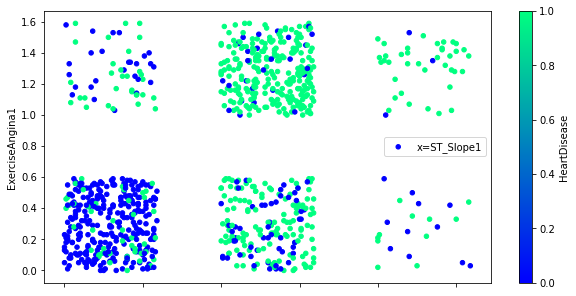

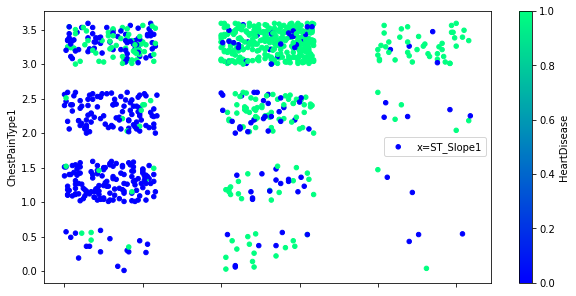

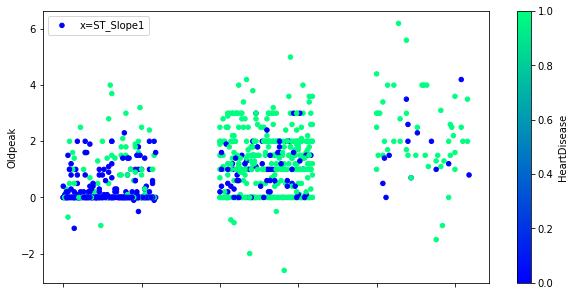

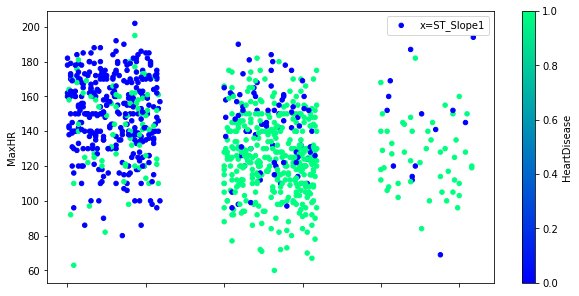

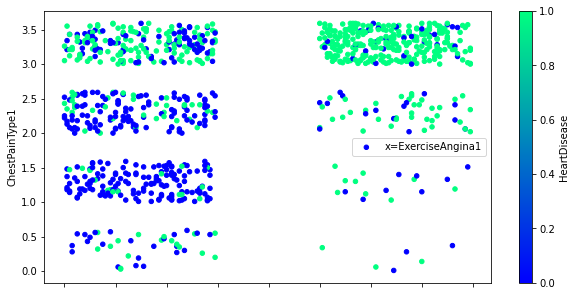

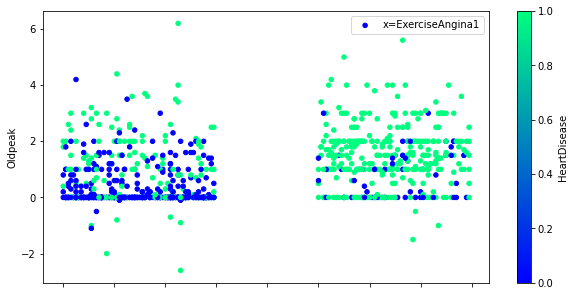

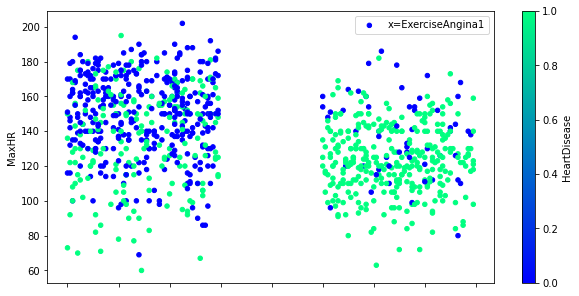

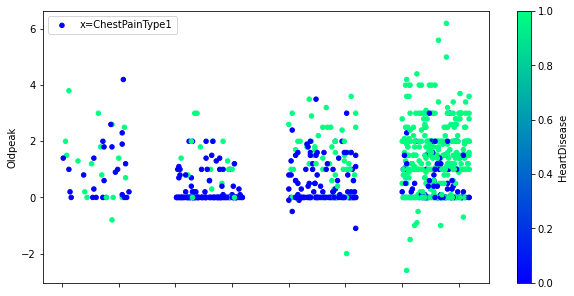

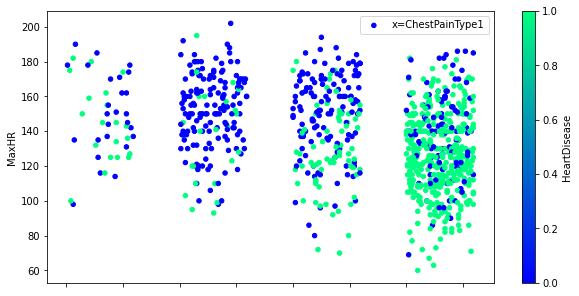

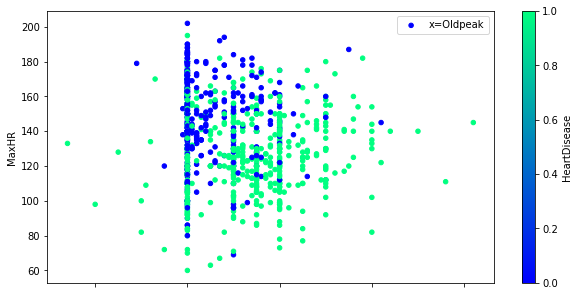

In [115]:
import random
aumento = 60
dt['ST_Slope1'] = dt['ST_Slope'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ExerciseAngina1'] = dt['ExerciseAngina'].apply(lambda x : x+(random.randrange(0,aumento)/100))
dt['ChestPainType1'] = dt['ChestPainType'].apply(lambda x : x+(random.randrange(0,aumento)/100))


# Gerar uma matriz de confusao:
All_col = ['ST_Slope1','ExerciseAngina1','ChestPainType1','Oldpeak','MaxHR']
col = []
for x in range(len(All_col)):
    for xx in range(x+1,len(All_col)):
        col.append( (All_col[x],All_col[xx]))
        

for c in col:
    dt.plot(kind='scatter', x=c[0], y = c[1], alpha=1,
        label='x='+c[0], title='',
        c='HeartDisease', cmap=plt.get_cmap("winter"),
        figsize=(10,5)
       )
    plt.legend()
 

In [14]:
print(col)

[('ST_Slope1', 'ExerciseAngina1'), ('ST_Slope1', 'ChestPainType1'), ('ST_Slope1', 'Oldpeak'), ('ST_Slope1', 'MaxHR'), ('ExerciseAngina1', 'ChestPainType1'), ('ExerciseAngina1', 'Oldpeak'), ('ExerciseAngina1', 'MaxHR'), ('ChestPainType1', 'Oldpeak'), ('ChestPainType1', 'MaxHR'), ('Oldpeak', 'MaxHR')]


In [15]:
print(col[0])

('ST_Slope1', 'ExerciseAngina1')


TypeError: unhashable type: 'Series'

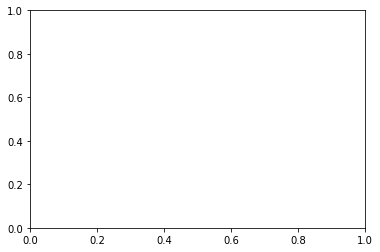

In [54]:
#ExerciseAngina
#ChestPainType
#HeartDisease
#ST_Slope
#Oldpeak


fig, ax = plt.subplots()
ax.scatter( 
        dt['ST_Slope1'],dt['ChestPainType1'], 
        c = dt['HeartDisease'].apply(lambda x : 'r' if x == 1 else 'g'),
        alpha = 0.5,
         marker = dt['ExerciseAngina'].apply(lambda x : '^' if x == 1 else 'o'),
)

ax.set_xlabel('st_slope')
ax.set_ylabel('Exercise Angina')

 
plt.show()


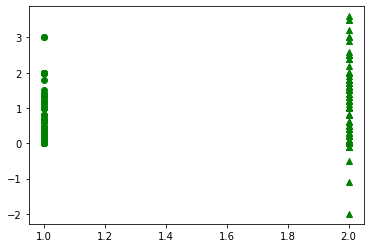

In [72]:
#ExerciseAngina
#ChestPainType
#HeartDisease
#ST_Slope
#Oldpeak

"""
fig, ax = plt.subplots()
ax.scatter( 
        dt['ChestPainType1'],dt['MaxHR'], 
        c = dt['HeartDisease'].apply(lambda x : 'r' if x == 1 else 'g'),
        alpha = 0.5,
 
)

ax.set_xlabel('Oldpeak')
ax.set_ylabel('MaxHR')

plt.show()
"""

hdy = dt[ dt['HeartDisease'] == 1]
hdn = dt[ dt['HeartDisease'] != 1]


#plt.scatter( dt['ChestPainType1'] , dt['MaxHR'], marker='^', c='r')
plt.scatter(dt[ dt['ChestPainType'] == 1].ChestPainType, dt[ dt['ChestPainType'] == 1].Oldpeak, marker='o', c='g')
plt.scatter(dt[ dt['ChestPainType'] == 2].ChestPainType, dt[ dt['ChestPainType'] == 2].Oldpeak, marker='^', c='g')
 



plt.plot()
# Show the boundary between the regions:
#theta = np.arange(0, np.pi / 2, 0.01)
#plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()



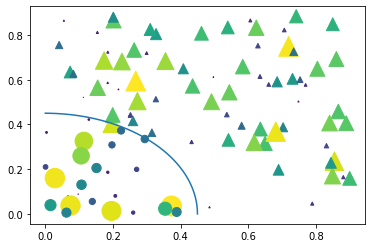

"\n#ExerciseAngina\n#ChestPainType\n#HeartDisease\n#ST_Slope\n#Oldpeak\n\n\nfig, ax = plt.subplots()\nax.scatter( \n        dt['ST_Slope1'],dt['ChestPainType1'], \n        c = dt['HeartDisease'].apply(lambda x : 'r' if x == 1 else 'g'),\n        alpha = 0.5,\n        # marker = dt['ExerciseAngina'].apply(lambda x : '^' if x == 1 else 'o'),\n)\n\nax.set_xlabel('st_slope')\nax.set_ylabel('Exercise Angina')\n\n \nplt.show()\n\n"

In [44]:
import numpy as np
N = 100
r0 = 0.45
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

"""
#ExerciseAngina
#ChestPainType
#HeartDisease
#ST_Slope
#Oldpeak


fig, ax = plt.subplots()
ax.scatter( 
        dt['ST_Slope1'],dt['ChestPainType1'], 
        c = dt['HeartDisease'].apply(lambda x : 'r' if x == 1 else 'g'),
        alpha = 0.5,
        # marker = dt['ExerciseAngina'].apply(lambda x : '^' if x == 1 else 'o'),
)

ax.set_xlabel('st_slope')
ax.set_ylabel('Exercise Angina')

 
plt.show()

"""


In [59]:
dt.corr( method='pearson')



Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age              1.000000  0.055750       0.165896   0.263079     0.006397   
Sex              0.055750  1.000000       0.168254   0.009421    -0.151270   
ChestPainType    0.165896  0.168254       1.000000   0.020645     0.007314   
RestingBP        0.263079  0.009421       0.020645   1.000000     0.096524   
Cholesterol      0.006397 -0.151270       0.007314   0.096524     1.000000   
FastingBS        0.198039  0.120076       0.116703   0.067816    -0.061967   
RestingECG       0.213152 -0.018343       0.031383   0.094498     0.089840   
MaxHR           -0.382045 -0.189186      -0.343654  -0.109669     0.072644   
ExerciseAngina   0.215793  0.190664       0.416625   0.153015     0.047294   
Oldpeak          0.258612  0.105734       0.245027   0.174215     0.059128   
ST_Slope         0.268264  0.150693       0.317480   0.082134     0.013094   
HeartDisease     0.282039  0.305445       0.471354   0.117930    -0.012340   
ST_Slope1        0.264696  0.140573       0.308416   0.087415     0.005862   
ExerciseAngina1  0.200066  0.177298       0.400591   0.117296     0.036451   
ChestPainType1   0.168847  0.158682       0.981937   0.022189     0.006241   

                 FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age               0.198039    0.213152 -0.382045        0.215793  0.258612   
Sex               0.120076   -0.018343 -0.189186        0.190664  0.105734   
ChestPainType     0.116703    0.031383 -0.343654        0.416625  0.245027   
RestingBP         0.067816    0.094498 -0.109669        0.153015  0.174215   
Cholesterol      -0.061967    0.089840  0.072644        0.047294  0.059128   
FastingBS         1.000000    0.050707 -0.131438        0.060451  0.052698   
RestingECG        0.050707    1.000000  0.048552        0.036119  0.114428   
MaxHR            -0.131438    0.048552  1.000000       -0.370425 -0.160691   
ExerciseAngina    0.060451    0.036119 -0.370425        1.000000  0.408752   
Oldpeak           0.052698    0.114428 -0.160691        0.408752  1.000000   
ST_Slope          0.175774    0.078807 -0.343419        0.428706  0.501921   
HeartDisease      0.267291    0.061011 -0.400421        0.494282  0.403951   
ST_Slope1         0.173285    0.060177 -0.330694        0.416845  0.477781   
ExerciseAngina1   0.059897    0.031797 -0.362165        0.943609  0.384467   
ChestPainType1    0.107522    0.021517 -0.333947        0.415160  0.233440   

                 ST_Slope  HeartDisease  ST_Slope1  ExerciseAngina1  \
Age              0.268264      0.282039   0.264696         0.200066   
Sex              0.150693      0.305445   0.140573         0.177298   
ChestPainType    0.317480      0.471354   0.308416         0.400591   
RestingBP        0.082134      0.117930   0.087415         0.117296   
Cholesterol      0.013094     -0.012340   0.005862         0.036451   
FastingBS        0.175774      0.267291   0.173285         0.059897   
RestingECG       0.078807      0.061011   0.060177         0.031797   
MaxHR           -0.343419     -0.400421  -0.330694        -0.362165   
ExerciseAngina   0.428706      0.494282   0.416845         0.943609   
Oldpeak          0.501921      0.403951   0.477781         0.384467   
ST_Slope         1.000000      0.558771   0.963925         0.397539   
HeartDisease     0.558771      1.000000   0.534298         0.460588   
ST_Slope1        0.963925      0.534298   1.000000         0.391510   
ExerciseAngina1  0.397539      0.460588   0.391510         1.000000   
ChestPainType1   0.308443      0.458214   0.301566         0.397902   

                 ChestPainType1  
Age                    0.168847  
Sex                    0.158682  
ChestPainType          0.981937  
RestingBP              0.022189  
Cholesterol            0.006241  
FastingBS              0.107522  
RestingECG             0.021517  
MaxHR                 -0.333947  
ExerciseAngina         0.415160  
Oldpeak                0.233440  
ST_Slope     

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age              1.000000  0.049679       0.135529   0.198952     0.002351   
Sex              0.049679  1.000000       0.172656   0.023569    -0.120458   
ChestPainType    0.135529  0.172656       1.000000   0.031233    -0.022086   
RestingBP        0.198952  0.023569       0.031233   1.000000     0.065899   
Cholesterol      0.002351 -0.120458      -0.022086   0.065899     1.000000   
FastingBS        0.166605  0.120076       0.122888   0.054704    -0.080754   
RestingECG       0.186005 -0.007239       0.045564   0.075961     0.078885   
MaxHR           -0.253123 -0.161226      -0.282159  -0.074506     0.077140   
ExerciseAngina   0.178587  0.190664       0.411663   0.136951     0.051744   
Oldpeak          0.217774  0.102901       0.242283   0.131832     0.050367   
ST_Slope         0.220852  0.149642       0.329933   0.070268    -0.002167   
HeartDisease     0.240006  0.305445       0.481276   0.097714    -0.033951   
ST_Slope1        0.167123  0.107999       0.258266   0.059105    -0.009827   
ExerciseAngina1  0.121424  0.128376       0.299100   0.065173     0.021833   
ChestPainType1   0.116366  0.129959       0.791087   0.027172    -0.016407   

                 FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age               0.166605    0.186005 -0.253123        0.178587  0.217774   
Sex               0.120076   -0.007239 -0.161226        0.190664  0.102901   
ChestPainType     0.122888    0.045564 -0.282159        0.411663  0.242283   
RestingBP         0.054704    0.075961 -0.074506        0.136951  0.131832   
Cholesterol      -0.080754    0.078885  0.077140        0.051744  0.050367   
FastingBS         1.000000    0.064972 -0.102513        0.060451  0.086521   
RestingECG        0.064972    1.000000  0.012015        0.048726  0.096343   
MaxHR            -0.102513    0.012015  1.000000       -0.322550 -0.150319   
ExerciseAngina    0.060451    0.048726 -0.322550        1.000000  0.388866   
Oldpeak           0.086521    0.096343 -0.150319        0.388866  1.000000   
ST_Slope          0.169694    0.076330 -0.298436        0.434612  0.447871   
HeartDisease      0.267291    0.070700 -0.333259        0.494282  0.366346   
ST_Slope1         0.133524    0.034104 -0.225585        0.336525  0.326722   
ExerciseAngina1   0.050692    0.026915 -0.242116        0.697383  0.269030   
ChestPainType1    0.085785    0.019116 -0.219409        0.337827  0.182308   

                 ST_Slope  HeartDisease  ST_Slope1  ExerciseAngina1  \
Age              0.220852      0.240006   0.167123         0.121424   
Sex              0.149642      0.305445   0.107999         0.128376   
ChestPainType    0.329933      0.481276   0.258266         0.299100   
RestingBP        0.070268      0.097714   0.059105         0.065173   
Cholesterol     -0.002167     -0.033951  -0.009827         0.021833   
FastingBS        0.169694      0.267291   0.133524         0.050692   
RestingECG       0.076330      0.070700   0.034104         0.026915   
MaxHR           -0.298436     -0.333259  -0.225585        -0.242116   
ExerciseAngina   0.434612      0.494282   0.336525         0.697383   
Oldpeak          0.447871      0.366346   0.326722         0.269030   
ST_Slope         1.000000      0.576033   0.750842         0.293707   
HeartDisease     0.576033      1.000000   0.431026         0.338110   
ST_Slope1        0.750842      0.431026   1.000000         0.235882   
ExerciseAngina1  0.293707      0.338110   0.235882         1.000000   
ChestPainType1   0.254918      0.375585   0.204945         0.243083   

                 ChestPainType1  
Age                    0.116366  
Sex                    0.129959  
ChestPainType          0.791087  
RestingBP              0.027172  
Cholesterol           -0.016407  
FastingBS              0.085785  
RestingECG             0.019116  
MaxHR                 -0.219409  
ExerciseAngina         0.337827  
Oldpeak                0.182308  
ST_Slope     

0      172
2       98
6      170
7      142
9      120
      ... 
903    163
904    169
906    166
910    182
916    174
Name: MaxHR, Length: 173, dtype: int64

In [82]:
#HeartDisease
hdy = dt[ dt['HeartDisease'] == 1]
hdn = dt[ dt['HeartDisease'] != 1]


cptY = [  hdy[ hdy['ChestPainType'] == i ] for i in range(4) ]
cptN = [  hdn[ hdn['ChestPainType'] == i ] for i in range(4) ]
#ExerciseAngina
#ChestPainType
#Oldpeak

#ST_Slope
plt.scatter(cpty[0].T_Slope, )


In [109]:
dt

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1      140.0        289.0          0           0   
1     49    0              2      160.0        180.0          0           0   
2     37    1              1      130.0        283.0          0           1   
3     48    0              3      138.0        214.0          0           0   
4     54    1              2      150.0        195.0          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              0      110.0        264.0          0           0   
914   68    1              3      144.0        193.0          1           0   
915   57    1              3      130.0        131.0          0           0   
916   57    0              1      130.0        236.0          0           2   
917   38    1              2      138.0        175.0          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         0             0  
1      156               0      1.0         1             1  
2       98               0      0.0         0             0  
3      108               1      1.5         1             1  
4      122               0      0.0         0             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         0             0  

[918 rows x 12 columns]

In [94]:
#RestingBP	Cholesterol

max(dt['Age'])


77

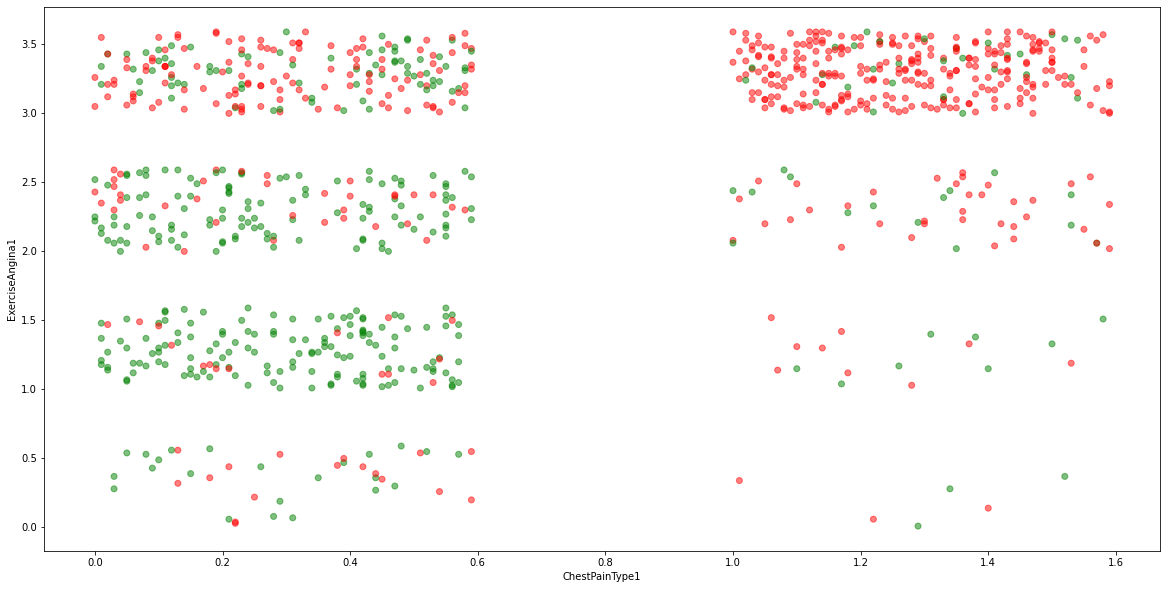

In [121]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.scatter( 
        dt['ExerciseAngina1'],dt['ChestPainType1'], 
        c = dt['HeartDisease'].apply(lambda x : 'r' if x == 1 else 'g'),
        alpha = 0.5,
        # marker = dt['ExerciseAngina'].apply(lambda x : '^' if x == 1 else 'o'),
)

ax.set_xlabel('ChestPainType1')
ax.set_ylabel('ExerciseAngina1')

 
plt.show()


In [1]:
"""
    Separação dos dados, 
"""

plt.rcParams["figure.figsize"] = (25,10)
dty = dt[ dt['HeartDisease'] == 1]
dtn = dt[ dt['HeartDisease'] != 1]

dt_failure_Pain = dty[ dty['ExerciseAngina'] == 1] 
dt_failure_     = dty[ dty['ExerciseAngina'] == 0] 

dt_work_Pain = dtn[ dtn['ExerciseAngina'] == 1] 
dt_work_     = dtn[ dtn['ExerciseAngina'] == 0] 

NameError: name 'plt' is not defined

Gráfico usando:  ChestPainType1 x ST_Slope1, + ExerciseAngina e HeartDisease


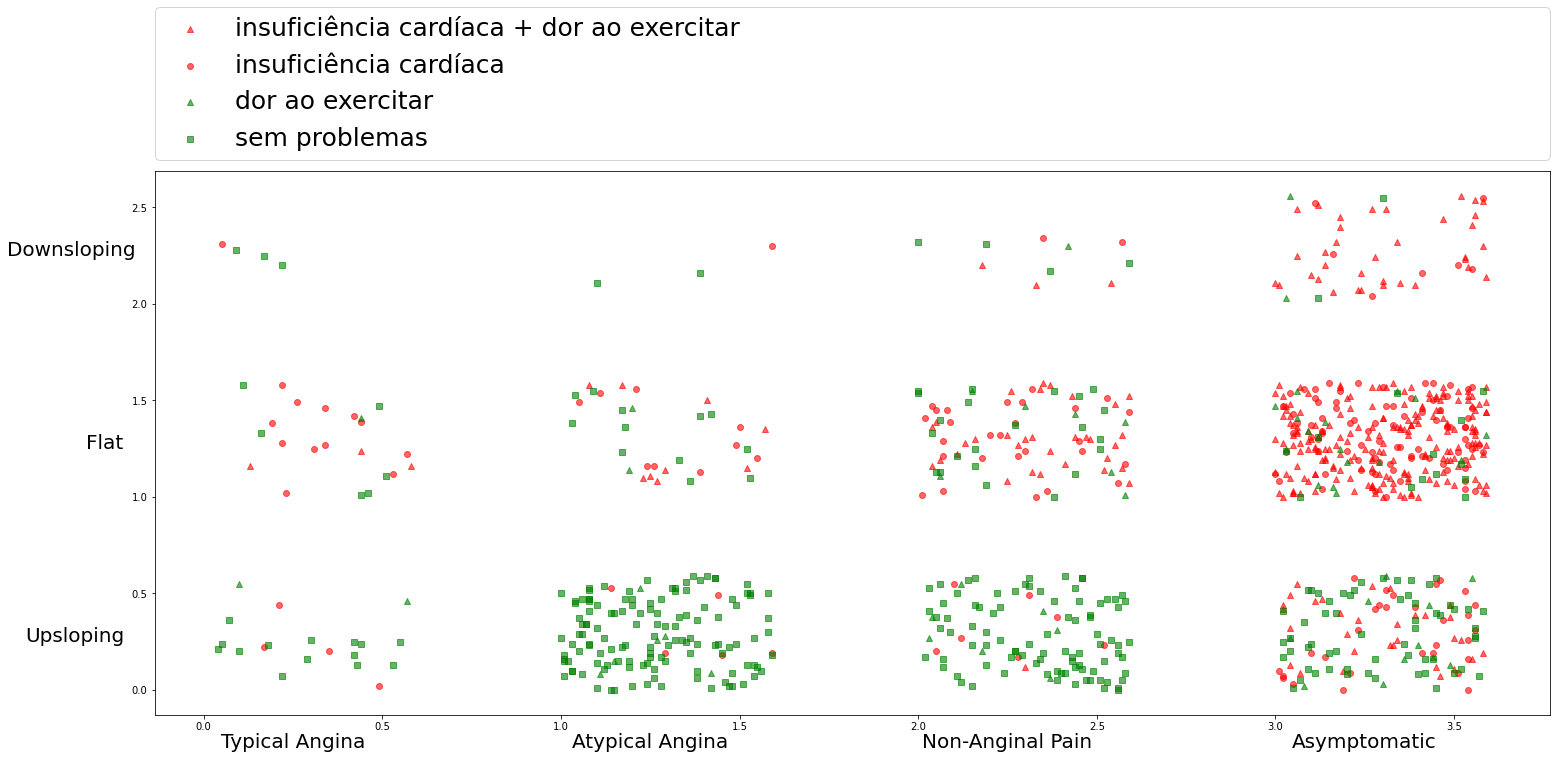

In [13]:


plt.scatter(dt_failure_Pain['ChestPainType1'],  dt_failure_Pain['ST_Slope1'], c='r', alpha=0.6, marker='^', label='insuficiência cardíaca + dor ao exercitar')
plt.scatter(    dt_failure_['ChestPainType1'],      dt_failure_['ST_Slope1'], c='r', alpha=0.6, marker='o', label='insuficiência cardíaca')
plt.scatter(   dt_work_Pain['ChestPainType1'],     dt_work_Pain['ST_Slope1'], c='g', alpha=0.6, marker='^', label='dor ao exercitar')
plt.scatter(       dt_work_['ChestPainType1'],         dt_work_['ST_Slope1'], c='g', alpha=0.6, marker='s', label='sem problemas')
 

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=1, fontsize=25)

# upsloping, Flat: flat, Down: downsloping


print("Gráfico usando:  ChestPainType1 x ST_Slope1, + ExerciseAngina e HeartDisease")
 
plt.text(-0.5, 0.25, "Upsloping", fontsize=20)
plt.text(-0.33, 1.25, "Flat", fontsize=20)
plt.text(-0.55, 2.25, "Downsloping", fontsize=20)

plt.text(0.25, -0.3, "Typical Angina", fontsize=20,  horizontalalignment='center')
plt.text(1.25, -0.3, "Atypical Angina", fontsize=20,  horizontalalignment='center')
plt.text(2.25, -0.3, "Non-Anginal Pain", fontsize=20,  horizontalalignment='center')
plt.text(3.25, -0.3, "Asymptomatic", fontsize=20,  horizontalalignment='center')
            
plt.plot()
plt.show()

Gráfico usando:  ChestPainType1 x ST_Slope1, + ExerciseAngina e HeartDisease


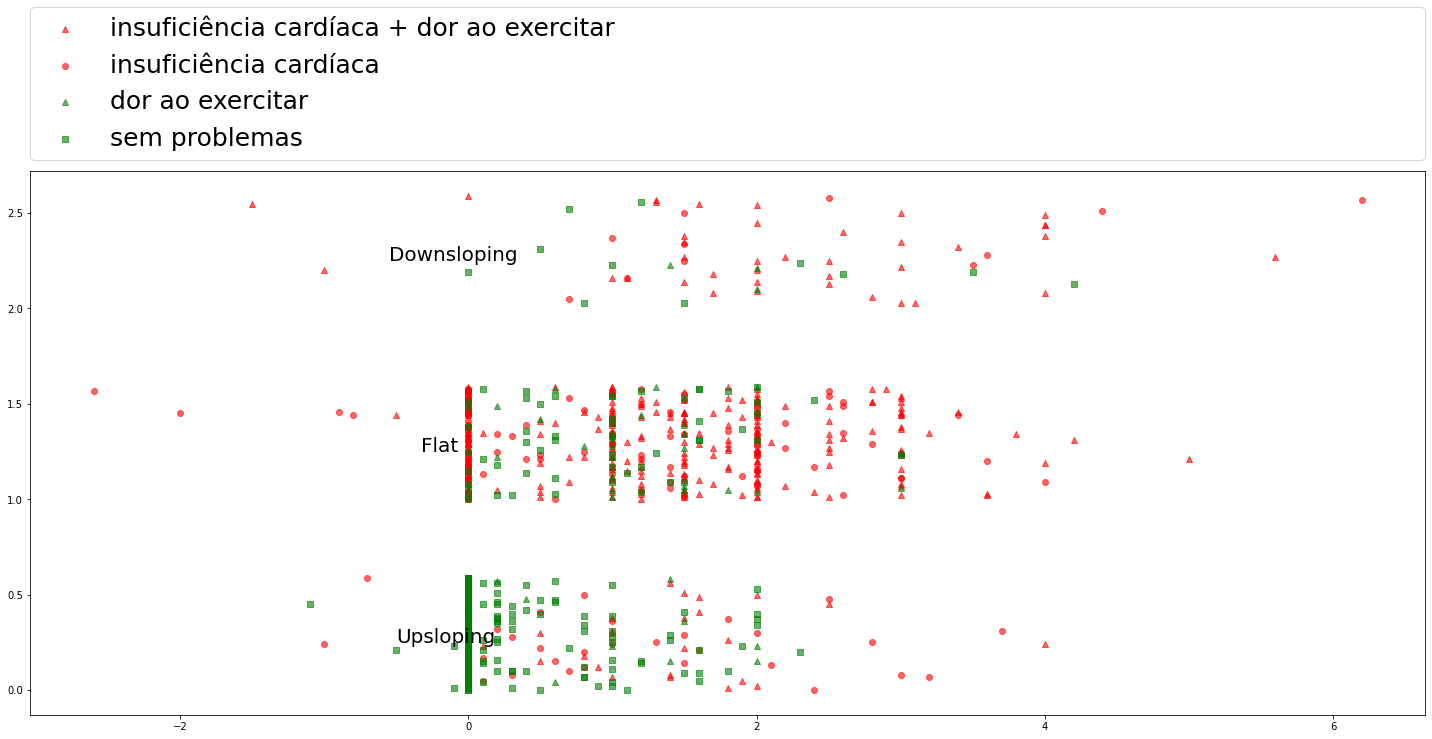

In [25]:
plt.rcParams["figure.figsize"] = (25,10)
dty = dt[ dt['HeartDisease'] == 1]
dtn = dt[ dt['HeartDisease'] != 1]

dt_failure_Pain = dty[ dty['ExerciseAngina'] == 1] 
dt_failure_     = dty[ dty['ExerciseAngina'] == 0] 

dt_work_Pain = dtn[ dtn['ExerciseAngina'] == 1] 
dt_work_     = dtn[ dtn['ExerciseAngina'] == 0] 



x = 'Oldpeak'
plt.scatter(dt_failure_Pain[x], dt_failure_Pain['ST_Slope1'], c='r', alpha=0.6, marker='^', label='insuficiência cardíaca + dor ao exercitar')
plt.scatter(    dt_failure_[x],      dt_failure_['ST_Slope1'], c='r', alpha=0.6, marker='o', label='insuficiência cardíaca')
plt.scatter(   dt_work_Pain[x],     dt_work_Pain['ST_Slope1'], c='g', alpha=0.6, marker='^', label='dor ao exercitar')
plt.scatter(       dt_work_[x],         dt_work_['ST_Slope1'], c='g', alpha=0.6, marker='s', label='sem problemas')
 

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=1, fontsize=25)

# upsloping, Flat: flat, Down: downsloping


print("Gráfico usando:  ChestPainType1 x ST_Slope1, + ExerciseAngina e HeartDisease")
 
plt.text(-0.5, 0.25, "Upsloping", fontsize=20)
plt.text(-0.33, 1.25, "Flat", fontsize=20)
plt.text(-0.55, 2.25, "Downsloping", fontsize=20)

#plt.text(0.25, -0.3, "Typical Angina", fontsize=20,  horizontalalignment='center')
#plt.text(1.25, -0.3, "Atypical Angina", fontsize=20,  horizontalalignment='center')
#plt.text(2.25, -0.3, "Non-Anginal Pain", fontsize=20,  horizontalalignment='center')
#plt.text(3.25, -0.3, "Asymptomatic", fontsize=20,  horizontalalignment='center')
            
plt.plot()
plt.show()